### ***DATASET PREPROCESSING AND APEENDING***

**Data preprocessing and correlation matrix of male records**

Out of range values in age column:
Empty DataFrame
Columns: [What is your age ?]
Index: []
Index: 503, Column: Do you have hair fall problem ?, Value: nan
Index: 503, Column: Is there anyone in your family having a hair fall problem or a baldness issue?, Value: nan
Index: 503, Column: Did you face any type of chronic illness in the past?, Value: nan
Index: 503, Column: Do you stay up late at night?, Value: nan
Index: 503, Column: Do you have any type of sleep disturbance?, Value: nan
Index: 503, Column: Do you think that in your area water is a reason behind hair fall problems?, Value: nan
Index: 8, Column: Do you use chemicals, hair gel, or color in your hair?, Value: Yea
Index: 503, Column: Do you use chemicals, hair gel, or color in your hair?, Value: nan
Index: 503, Column: Do you have anemia?, Value: nan
Index: 503, Column: Do you have too much stress, Value: nan


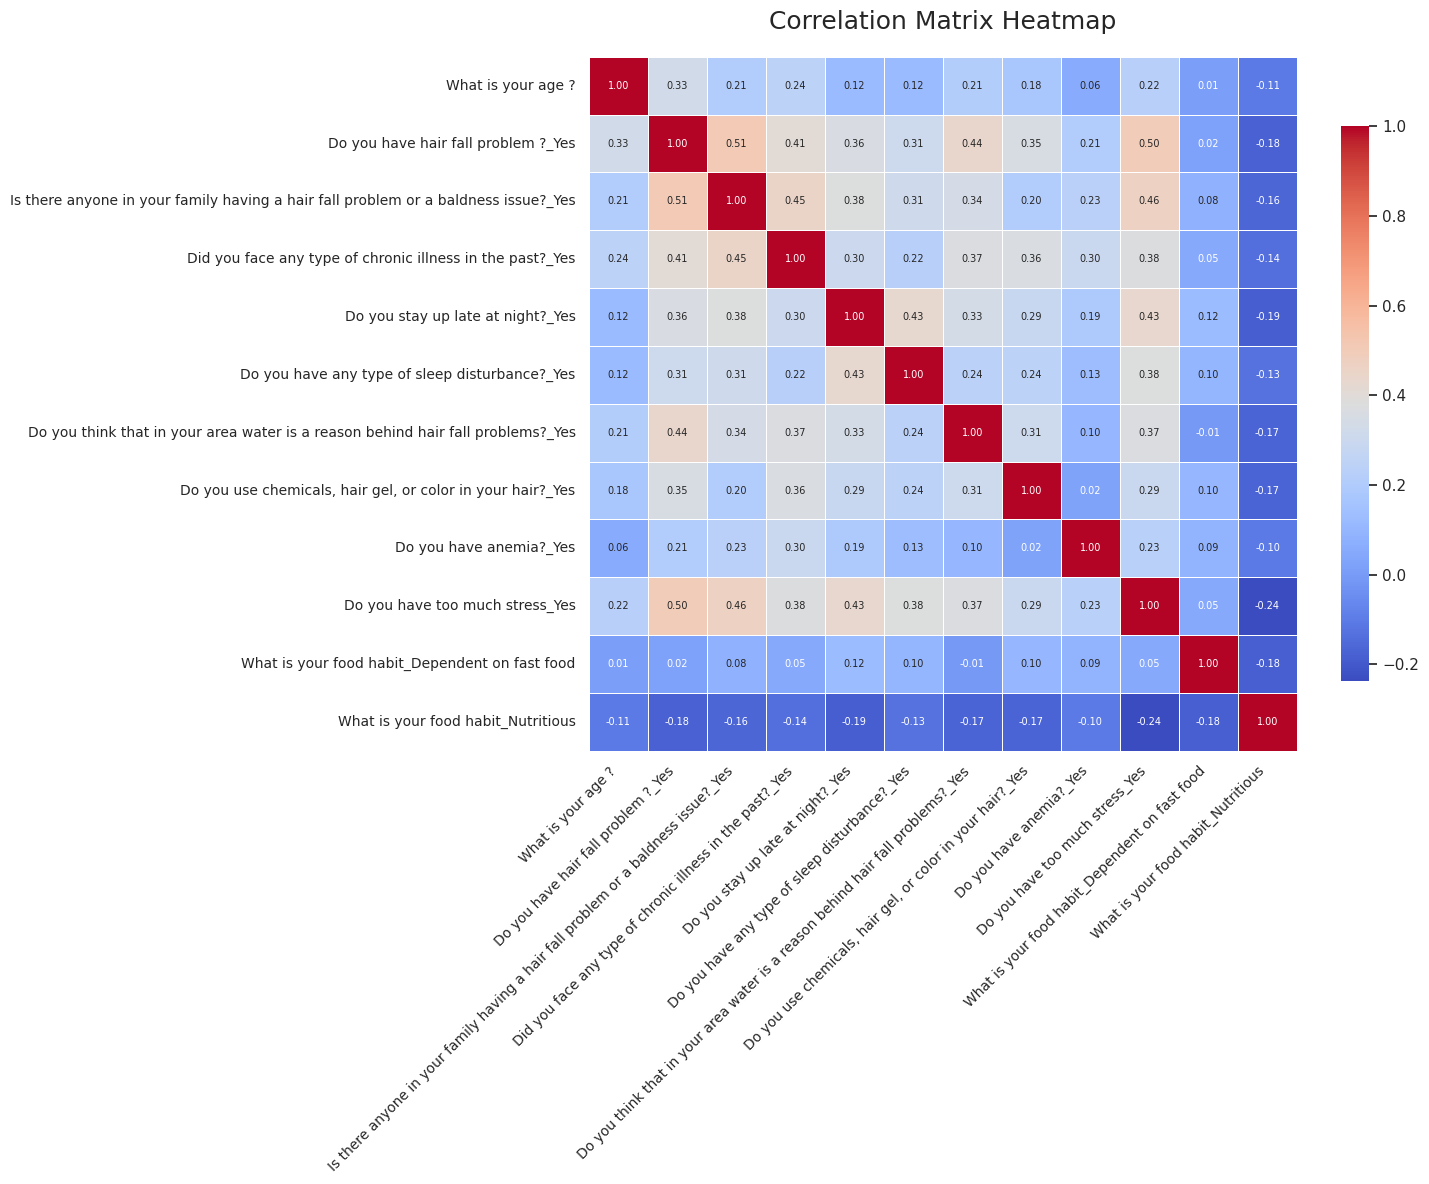

**Table of correlation matrix values with the target variable** 

Do you have hair fall problem ?_Yes                                                   1.000000
Is there anyone in your family having a hair fall problem or a baldness issue?_Yes    0.510295
Do you have too much stress_Yes                                                       0.500298
Do you think that in your area water is a reason behind hair fall problems?_Yes       0.436824
Did you face any type of chronic illness in the past?_Yes                             0.405978
Do you stay up late at night?_Yes                                                     0.357037
Do you use chemicals, hair gel, or color in your hair?_Yes                            0.354680
What is your age ?                                                                    0.327282
Do you have any type of sleep disturbance?_Yes                                        0.309500
Do you have anemia?_Yes                                                        

,What is your age ?,Do you have hair fall problem ?_Yes,Is there anyone in your family having a hair fall problem or a baldness issue?_Yes,Did you face any type of chronic illness in the past?_Yes,Do you stay up late at night?_Yes,Do you have any type of sleep disturbance?_Yes,Do you think that in your area water is a reason behind hair fall problems?_Yes,"Do you use chemicals, hair gel, or color in your hair?_Yes",Do you have anemia?_Yes,Do you have too much stress_Yes,What is your food habit_Dependent on fast food,What is your food habit_Nutritious
0,22.0,1,1,1,1,0,0,0,1,1,0,0
1,18.0,0,0,0,0,0,1,1,0,0,0,0
2,25.0,1,1,1,0,0,1,0,0,1,0,0
3,17.0,0,0,0,1,0,1,0,1,1,0,0
4,28.0,0,1,1,1,0,1,0,1,1,0,1


In [ ]:
import pandas as pd
import seaborn as sns
import numpy
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

data = pd.read_csv("hairfall_problem3592.xlsx - hairfall_problem3592 (2).csv")  #read and preprocess the data
#data = pd.read_csv('/content/survey data.csv')
male_records = data[data['What is your gender ?'] == 'Male']
df = male_records.drop(columns=["Timestamp", "What is your name ?"], axis=1)  #drop irrelevant columns for analysis

#check the age column for incorrect values
invalid_ages = df[(df['What is your age ?'] < 0) | (df['What is your age ?'] > 120)]
#print the error value and its index
print("Out of range values in age column:")
print(invalid_ages[['What is your age ?']])

#replace the incorrect age to 18
df.loc[503, 'What is your age ?'] = 18  # Correcting 218 to 18

# Columns to exclude from checking
excluded_columns = [
    "What is your age ?",
    "What is your gender ?",
    "What is your food habit"
]

# Check for anomalies in all other columns
for i in range(df.shape[1]):
    col_name = df.columns[i]
    if col_name in excluded_columns:
        continue

    for index, row in df.iterrows():
        value = str(row[col_name]).strip().lower()
        if value != "yes" and value != "no":
            print(f"Index: {index}, Column: {col_name}, Value: {row[col_name]}")

df.loc[8, 'Do you use chemicals, hair gel, or color in your hair?'] = 'Yes'  #correcting yea to Yes

#apply one-hot encoding to the filtered dataset
df = pd.get_dummies(df, drop_first=True)
df = df.astype({col: int for col in df.columns if df[col].dtype == bool})

#correlation matrix
corr_matrix = df.corr()  #compute the correlation matrix
plt.figure(figsize=(15, 12))  #plot the heatmap
sns.heatmap(
    corr_matrix,
    annot=True,
    annot_kws={"size": 7},
    cmap='coolwarm',
    fmt='.2f',
    linewidths=0.5,
    linecolor='white',
    cbar=True,
    cbar_kws={'shrink': 0.8}
)

plt.title('Correlation Matrix Heatmap', fontsize=18, pad=20)
plt.xticks(fontsize=10, rotation=45, ha='right')
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

#display table of corr with the target variable sorted from highest to lowest value
print("**Table of correlation matrix values with the target variable** \n")
target_variable = 'Do you have hair fall problem ?_Yes'
correlation_with_target = df.corr()[target_variable]
print(correlation_with_target.sort_values(ascending=False))
df.head()

**Drop the columns with lowest corr values**

In [ ]:
data_relevant_columns = df.drop(columns=["Do you have any type of sleep disturbance?_Yes",
                                         "Do you have anemia?_Yes", "What is your food habit_Nutritious",
                                         "What is your food habit_Dependent on fast food"]
                                         ,axis=1)

data_relevant_columns.head()
data_relevant_columns.count()
data_relevant_columns.to_csv("preprocessed_mendeley_dataset.csv", index=False)

In [ ]:
#data_relevant_columns.head()
data_relevant_columns.shape

(460, 8)

**Preproccessing and appending the new records from the questionnaire to the dataset with relevant columns**

In [ ]:
#loading the Google Forms dataset
responses_df = pd.read_csv("חיזוי נשירת שיער (Responses) - Form Responses 1 (1).csv")
#responses_df = pd.read_csv('/content/Form Responses.csv')

#column name mapping
column_mapping = {
    "מהו גילך?": "What is your age ?",
    "האם אתה חווה נשירת שיער או נסיגה של קו השיער?": "Do you have hair fall problem ?_Yes",
    "האם מישהו במשפחתך חווה נשירת שיער או התקרחות?": "Is there anyone in your family having a hair fall problem or a baldness issue?_Yes",
    "האם התמודדת עם סוג כלשהו של מחלה כרונית בעבר?": "Did you face any type of chronic illness in the past?_Yes",
    "אתה נשאר ער עד מאוחר בלילה?": "Do you stay up late at night?_Yes",
    "האם אתה חושב שבאזור שלך מים הם סיבה מאחורי בעיות נשירת שיער?": "Do you think that in your area water is a reason behind hair fall problems?_Yes",
    "האם אתה משתמש בכימיקלים, ג'ל לשיער או צבע בשיער שלך?": "Do you use chemicals, hair gel, or color in your hair?_Yes",
    "האם אתה חווה לעיתים לחץ נפשי או תקופות מתוחות?": "Do you have too much stress_Yes"
}

#rename Hebrew columns
responses_df_renamed = responses_df.rename(columns=column_mapping)

#align only the relevant/common columns for merging
common_columns = list(set(data_relevant_columns.columns) & set(responses_df_renamed.columns))

#subset both dataFrames
data_eng = data_relevant_columns[common_columns]
data_heb = responses_df_renamed[common_columns].copy()

# Convert all Yes/No columns in data_heb to 1/0
for col in data_heb.columns:
    if data_heb[col].nunique() == 2 and set(data_heb[col].dropna().unique()) <= {"Yes", "No"}:
        data_heb[col] = data_heb[col].map({"Yes": 1, "No": 0})

#combine both datasets
combined_df = pd.concat([data_eng, data_heb], ignore_index=True)

# combined_df.count()
combined_df.head()
combined_df.shape

(484, 8)

In [ ]:
print("Existing English columns:\n", data_relevant_columns.columns.tolist())
print("\nRenamed Hebrew columns:\n", responses_df_renamed.columns.tolist())

Existing English columns:
 ['What is your age ?', 'Do you have hair fall problem ?_Yes', 'Is there anyone in your family having a hair fall problem or a baldness issue?_Yes', 'Did you face any type of chronic illness in the past?_Yes', 'Do you stay up late at night?_Yes', 'Do you think that in your area water is a reason behind hair fall problems?_Yes', 'Do you use chemicals, hair gel, or color in your hair?_Yes', 'Do you have too much stress_Yes']

Renamed Hebrew columns:
 ['Timestamp', 'What is your age ?', 'Do you have hair fall problem ?_Yes', 'Is there anyone in your family having a hair fall problem or a baldness issue?_Yes', 'Did you face any type of chronic illness in the past?_Yes', 'Do you stay up late at night?_Yes', 'Do you think that in your area water is a reason behind hair fall problems?_Yes', 'Do you use chemicals, hair gel, or color in your hair?_Yes', 'Do you have too much stress_Yes']


Apply Min-Max normalization for Age column

In [ ]:
scaler = MinMaxScaler()

combined_df["What is your age ?"] = scaler.fit_transform(
    combined_df[["What is your age ?"]]
)


**New correlation matrix after appending the questionnaire **

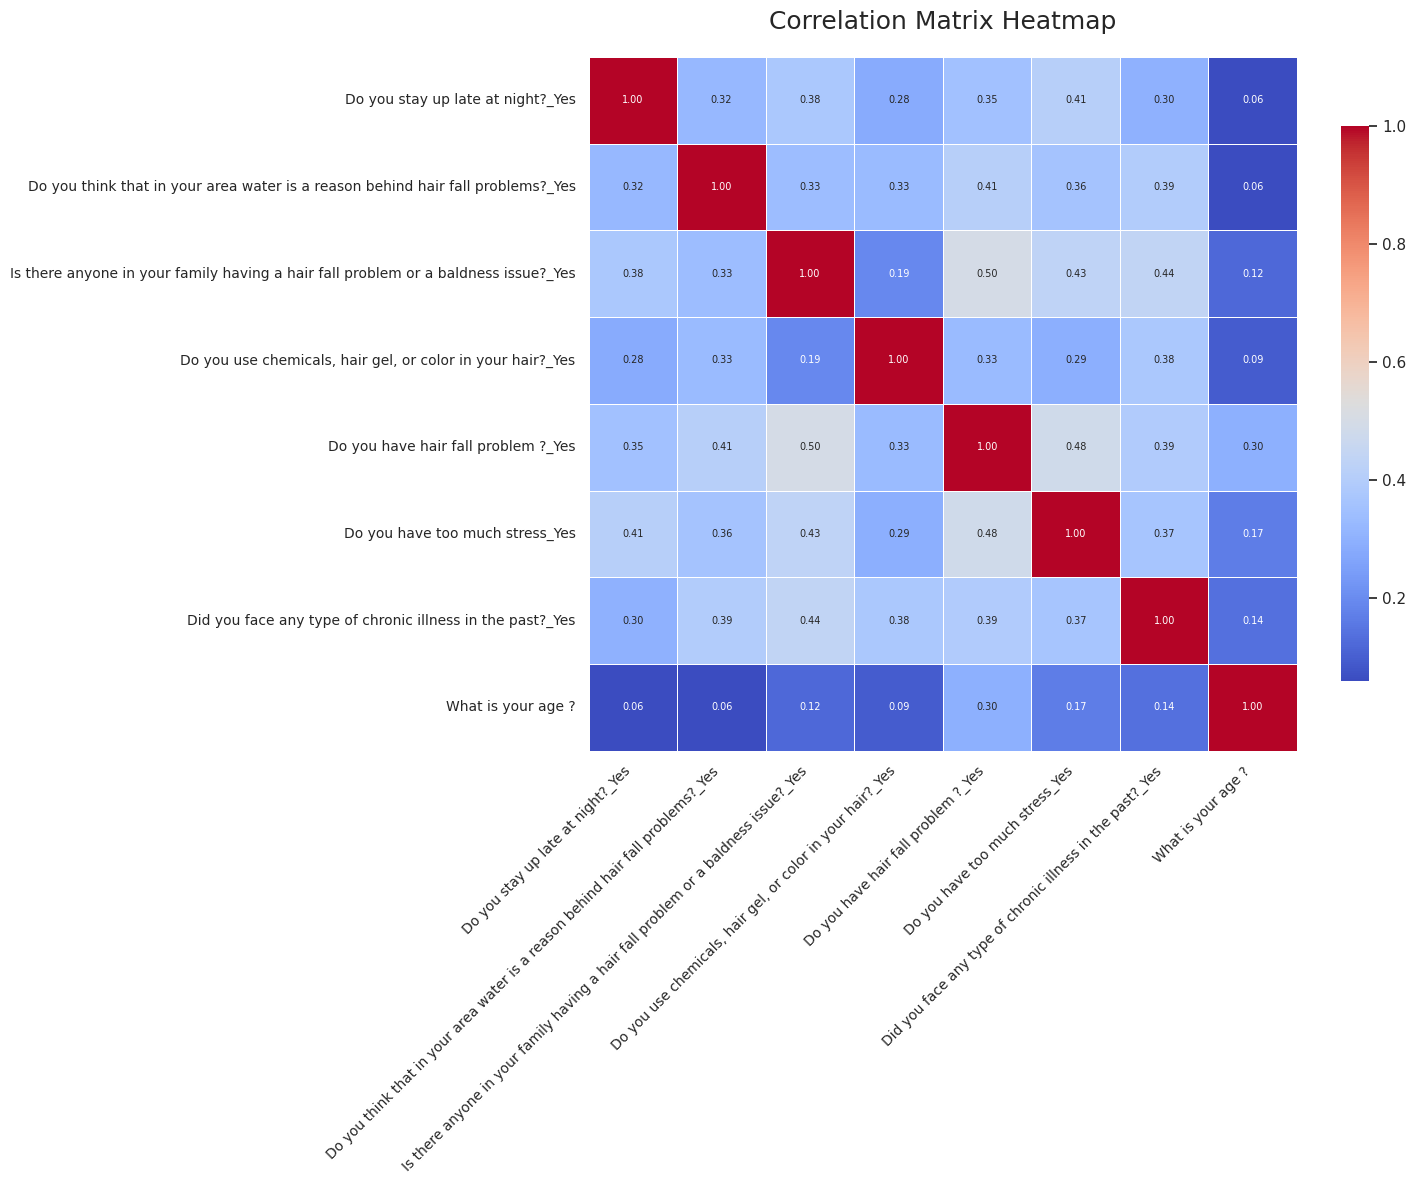

**Table of correlation matrix values with the target variable** 

Do you have hair fall problem ?_Yes                                                   1.000000
Is there anyone in your family having a hair fall problem or a baldness issue?_Yes    0.497499
Do you have too much stress_Yes                                                       0.483251
Do you think that in your area water is a reason behind hair fall problems?_Yes       0.408046
Did you face any type of chronic illness in the past?_Yes                             0.390889
Do you stay up late at night?_Yes                                                     0.351738
Do you use chemicals, hair gel, or color in your hair?_Yes                            0.330020
What is your age ?                                                                    0.296860
Name: Do you have hair fall problem ?_Yes, dtype: float64


In [ ]:
combined_df = combined_df.astype({col: int for col in combined_df.columns if combined_df[col].dtype == bool})
corr_matrix = combined_df.corr()  #compute the correlation matrix

plt.figure(figsize=(15, 12))  #plot the heatmap
sns.heatmap(
    corr_matrix,
    annot=True,
    annot_kws={"size": 7},
    cmap='coolwarm',
    fmt='.2f',
    linewidths=0.5,
    linecolor='white',
    cbar=True,
    cbar_kws={'shrink': 0.8}
)

plt.title('Correlation Matrix Heatmap', fontsize=18, pad=20)
plt.xticks(fontsize=10, rotation=45, ha='right')
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

#display table of corr with the target variable sorted from highest to lowest value
print("**Table of correlation matrix values with the target variable** \n")
target_variable = 'Do you have hair fall problem ?_Yes'
correlation_with_target = combined_df.corr()[target_variable]
print(correlation_with_target.sort_values(ascending=False))


### ***GRAPHS ON THE FINAL DATA FRAME*** (combined_df)

COLUMN BOX PLOT

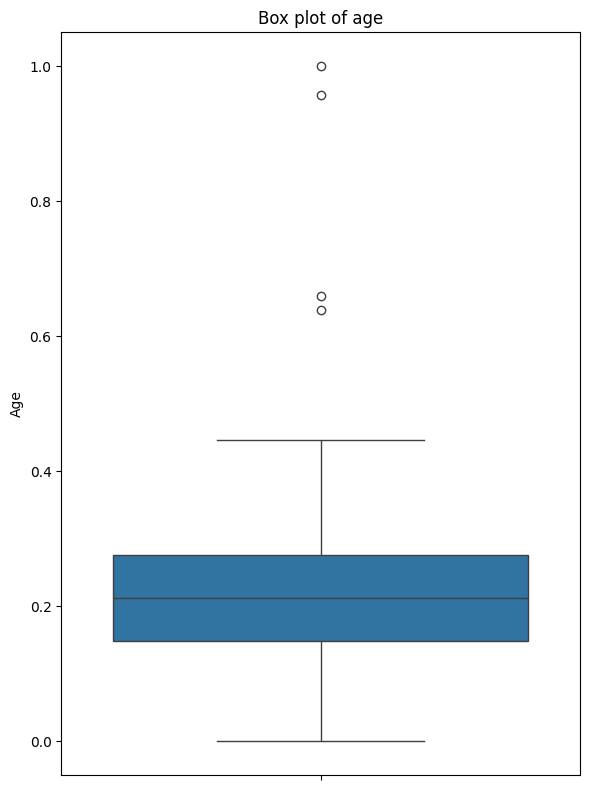

In [ ]:
plt.figure(figsize=(6, 8))
sns.boxplot(y=combined_df['What is your age ?'])
plt.title('Box plot of age')
plt.ylabel('Age')
plt.tight_layout()
plt.show()


CATEGORICAL COLUMNS DISTRIBUTION GRAPH

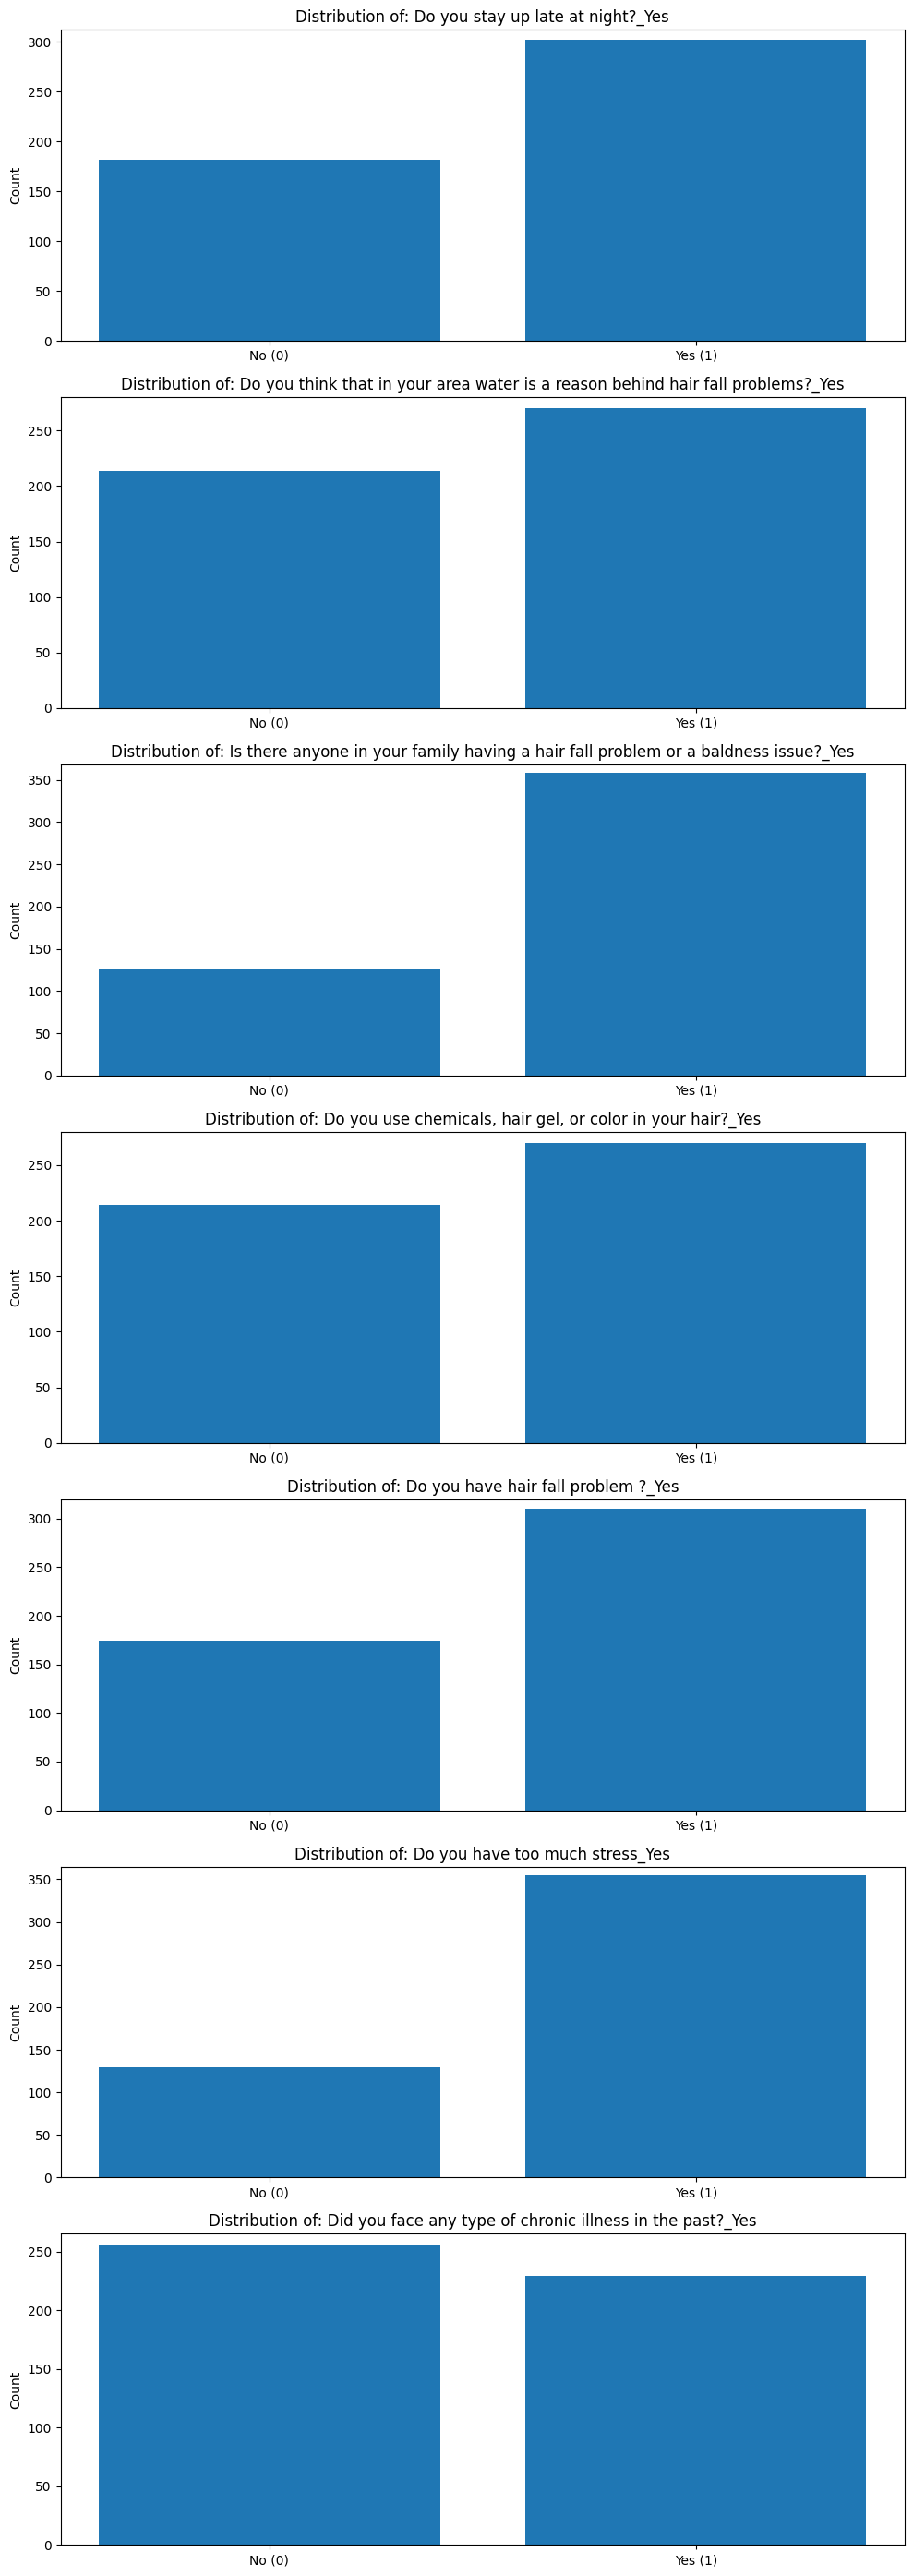

In [ ]:
import matplotlib.pyplot as plt

#binary columns (assuming all are 0/1)
binary_cols = [col for col in combined_df.columns if set(combined_df[col].unique()).issubset({0, 1})]

#plot distributions
fig, axes = plt.subplots(nrows=len(binary_cols), figsize=(10, 4 * len(binary_cols)))

if len(binary_cols) == 1:
    axes = [axes]  #make it iterable

for i, col in enumerate(binary_cols):
    counts = combined_df[col].value_counts().sort_index()
    axes[i].bar(['No (0)', 'Yes (1)'], counts)
    axes[i].set_title(f'Distribution of: {col}')
    axes[i].set_ylabel('Count')
    axes[i].set_ylim(0, max(counts) + 10)

plt.tight_layout()
plt.show()


Gaussian Bell Curve

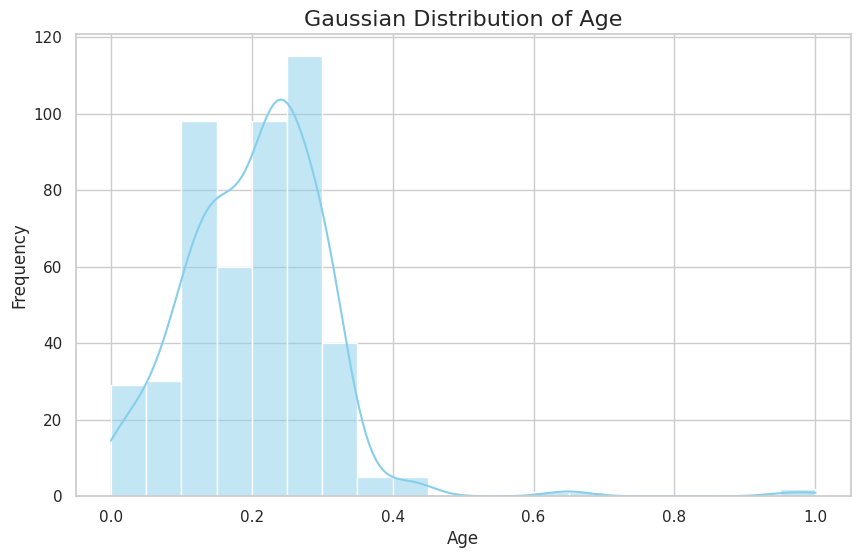

In [ ]:
#set the style for the plot
sns.set(style="whitegrid")

#plot the Gaussian bell curve for the Age column
plt.figure(figsize=(10, 6))
sns.histplot(combined_df['What is your age ?'], kde=True, color='skyblue', bins=20)

plt.title("Gaussian Distribution of Age", fontsize=16)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(True)
plt.show()

### ***SURVEY DATASET MODEL DEVELOPMENT AND TESTING***

## Table models

**Logistic Regression**

Accuracy: 0.7422680412371134
              precision    recall  f1-score   support

           0       0.59      0.53      0.56        30
           1       0.80      0.84      0.82        67

    accuracy                           0.74        97
   macro avg       0.70      0.68      0.69        97
weighted avg       0.74      0.74      0.74        97



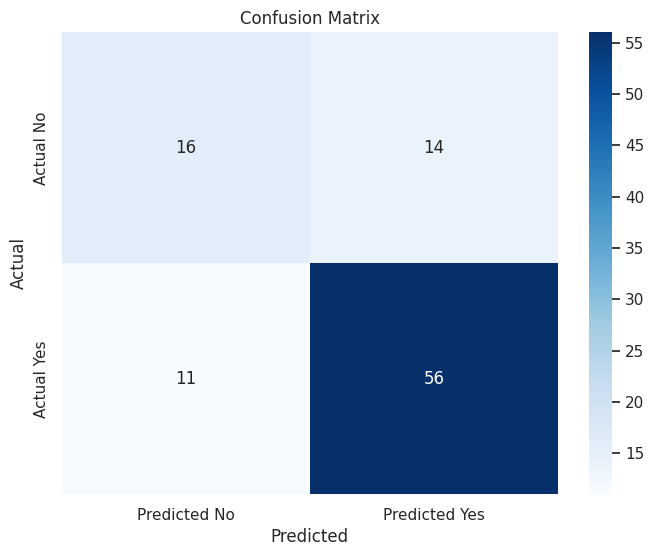

In [ ]:
# prompt: I want tio run logistic regression on my data frame combined_df

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define features (X) and target (y)
X = combined_df.drop('Do you have hair fall problem ?_Yes', axis=1)
y = combined_df['Do you have hair fall problem ?_Yes']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
lr_accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {lr_accuracy}")

print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted No', 'Predicted Yes'],
            yticklabels=['Actual No', 'Actual Yes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


logistic regression with grid search cv library

Best Parameters: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy: 0.7835051546391752
              precision    recall  f1-score   support

           0       0.67      0.60      0.63        30
           1       0.83      0.87      0.85        67

    accuracy                           0.78        97
   macro avg       0.75      0.73      0.74        97
weighted avg       0.78      0.78      0.78        97



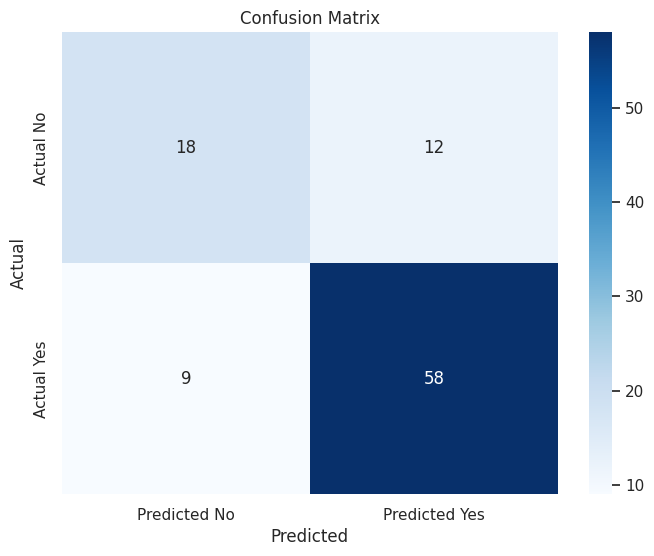

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define features (X) and target (y)
X = combined_df.drop('Do you have hair fall problem ?_Yes', axis=1)
y = combined_df['Do you have hair fall problem ?_Yes']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Set up parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'liblinear']
}

# Initialize model
lr = LogisticRegression(max_iter=1000)

# Run GridSearchCV
grid = GridSearchCV(lr, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)

# Best estimator
best_model = grid.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model
lr_accuracy_cv = accuracy_score(y_test, y_pred)
print(f"Best Parameters: {grid.best_params_}")
print(f"Accuracy: {lr_accuracy_cv}")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted No', 'Predicted Yes'],
            yticklabels=['Actual No', 'Actual Yes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


**K-Nearest Neighbors (KNN)**

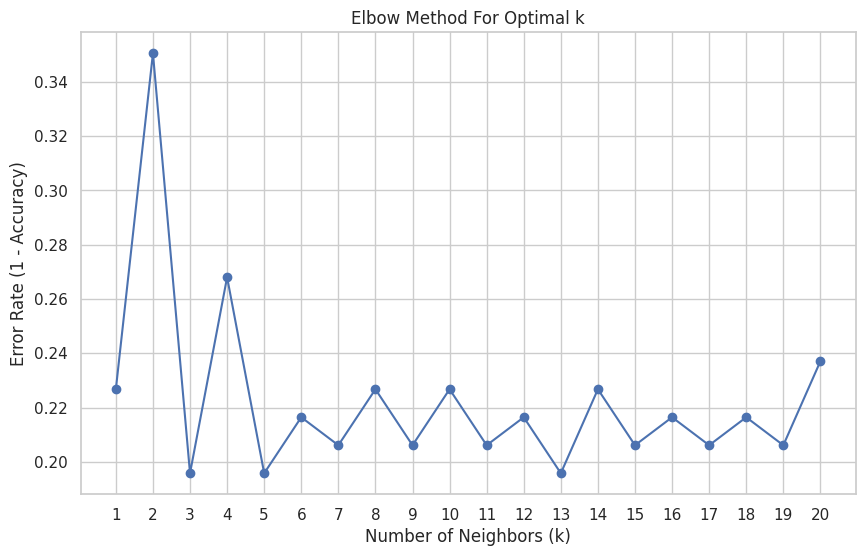

KNN Accuracy: 0.8041
              precision    recall  f1-score   support

           0       0.72      0.60      0.65        30
           1       0.83      0.90      0.86        67

    accuracy                           0.80        97
   macro avg       0.78      0.75      0.76        97
weighted avg       0.80      0.80      0.80        97



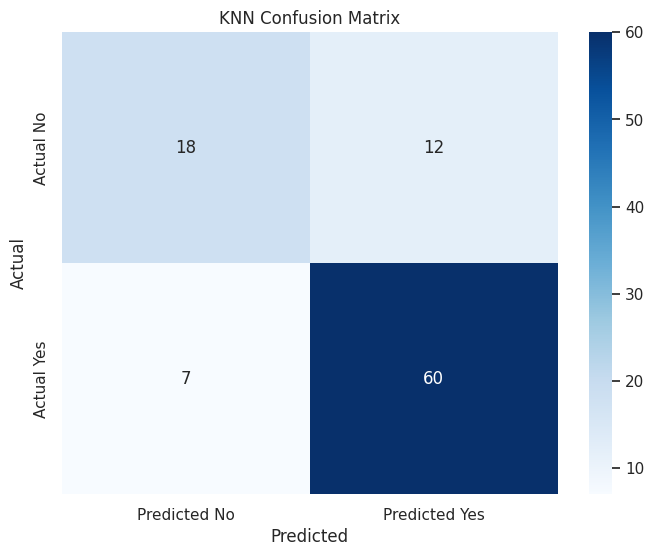

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# --- Elbow method for K ---
error_rates = []

# Try K values from 1 to 20
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    pred_k = knn.predict(X_test)
    error = 1 - accuracy_score(y_test, pred_k)  # error = 1 - accuracy
    error_rates.append(error)

# Plot the Elbow Graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), error_rates, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Error Rate (1 - Accuracy)')
plt.xticks(range(1, 21))
plt.grid(True)
plt.show()

# --- Your original KNN Model ---
# Initialize and train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)  #5 is the ideal result
knn_model.fit(X_train, y_train)

# Make predictions on the test set
knn_y_pred = knn_model.predict(X_test)

# Evaluate the KNN model
knn_accuracy = accuracy_score(y_test, knn_y_pred)
print(f"KNN Accuracy: {knn_accuracy:.4f}")

print(classification_report(y_test, knn_y_pred))

# Confusion matrix for KNN
knn_cm = confusion_matrix(y_test, knn_y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(knn_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted No', 'Predicted Yes'],
            yticklabels=['Actual No', 'Actual Yes'])
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


KNN with grid search cv library

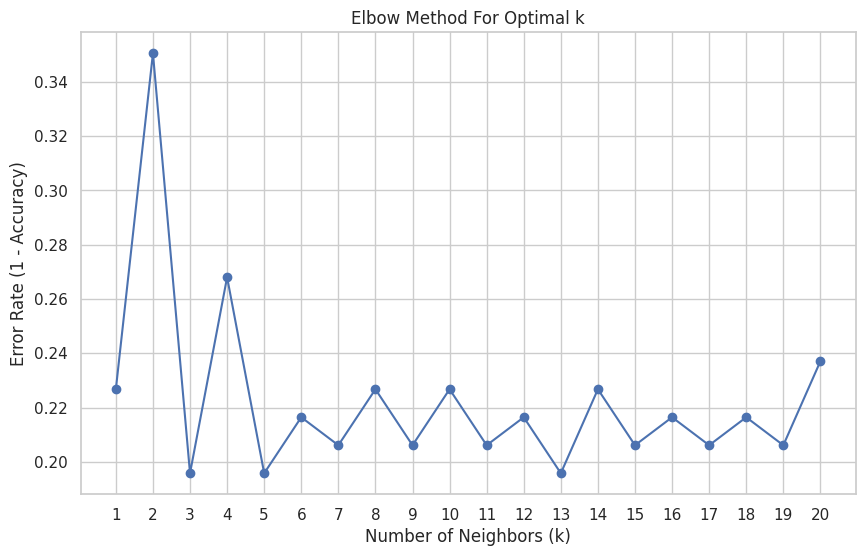

Best Parameters: {'n_neighbors': 11}
KNN Accuracy: 0.7938
              precision    recall  f1-score   support

           0       0.73      0.53      0.62        30
           1       0.81      0.91      0.86        67

    accuracy                           0.79        97
   macro avg       0.77      0.72      0.74        97
weighted avg       0.79      0.79      0.78        97



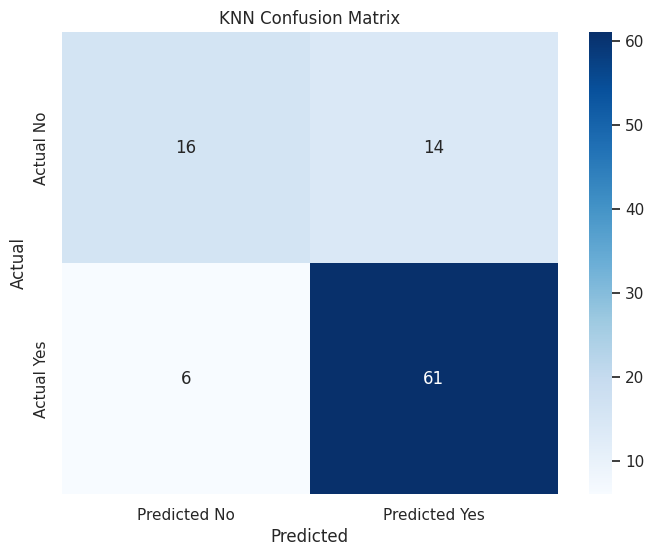

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# --- Elbow method for K ---
error_rates = []

# Try K values from 1 to 20
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    pred_k = knn.predict(X_test)
    error = 1 - accuracy_score(y_test, pred_k)
    error_rates.append(error)

# Plot the Elbow Graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), error_rates, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Error Rate (1 - Accuracy)')
plt.xticks(range(1, 21))
plt.grid(True)
plt.show()

# --- GridSearchCV to find best k ---
param_grid = {'n_neighbors': list(range(1, 21))}

grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_knn.fit(X_train, y_train)

# Best KNN model
best_knn = grid_knn.best_estimator_

# Make predictions
knn_y_pred = best_knn.predict(X_test)

# Evaluate
knn_accuracy_cv = accuracy_score(y_test, knn_y_pred)
print(f"Best Parameters: {grid_knn.best_params_}")
print(f"KNN Accuracy: {knn_accuracy_cv:.4f}")
print(classification_report(y_test, knn_y_pred))

# Confusion matrix
knn_cm = confusion_matrix(y_test, knn_y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(knn_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted No', 'Predicted Yes'],
            yticklabels=['Actual No', 'Actual Yes'])
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


**Random Forest**

Random Forest Accuracy: 0.7835
              precision    recall  f1-score   support

           0       0.64      0.70      0.67        30
           1       0.86      0.82      0.84        67

    accuracy                           0.78        97
   macro avg       0.75      0.76      0.75        97
weighted avg       0.79      0.78      0.79        97



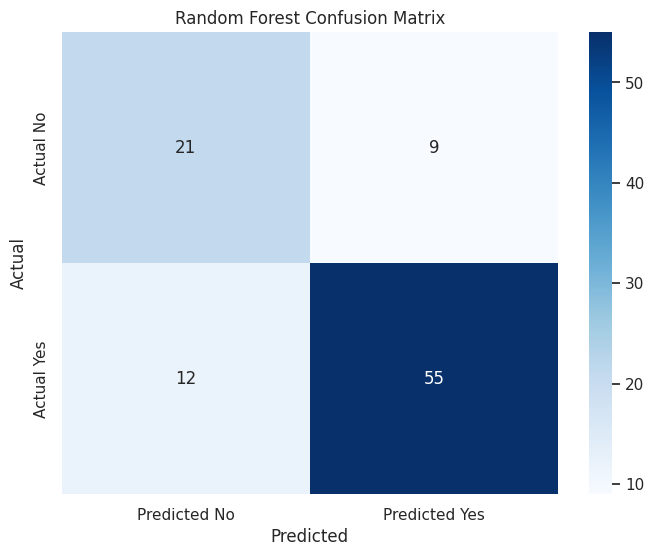

In [ ]:
# prompt: run Random Forest on combined_df

import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Assuming combined_df is already defined and preprocessed as in your code

# Define features (X) and target (y)
X = combined_df.drop('Do you have hair fall problem ?_Yes', axis=1)
y = combined_df['Do you have hair fall problem ?_Yes']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)  # You can adjust hyperparameters here
rf_model.fit(X_train, y_train)

# Make predictions on the test set
rf_y_pred = rf_model.predict(X_test)

# Evaluate the Random Forest model
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")

print(classification_report(y_test, rf_y_pred))

# Confusion matrix for Random Forest
rf_cm = confusion_matrix(y_test, rf_y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted No', 'Predicted Yes'],
            yticklabels=['Actual No', 'Actual Yes'])
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


random forest with grid search cv

Best Parameters: {'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 50}
Random Forest Accuracy: 0.8144
              precision    recall  f1-score   support

           0       0.77      0.57      0.65        30
           1       0.83      0.93      0.87        67

    accuracy                           0.81        97
   macro avg       0.80      0.75      0.76        97
weighted avg       0.81      0.81      0.81        97



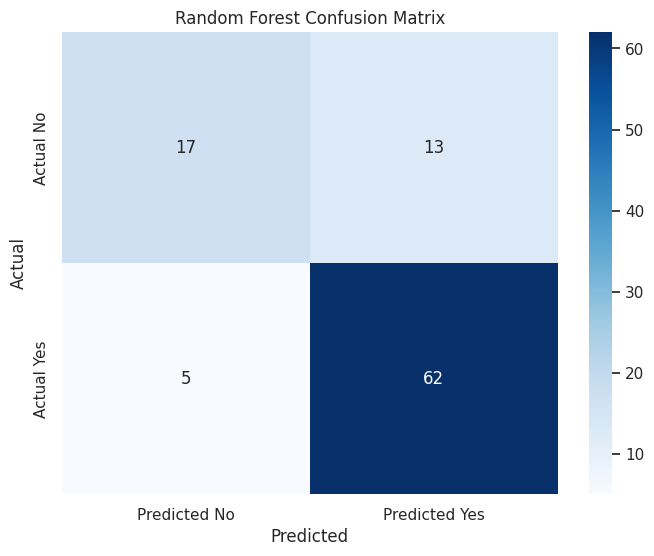

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define features (X) and target (y)
X = combined_df.drop('Do you have hair fall problem ?_Yes', axis=1)
y = combined_df['Do you have hair fall problem ?_Yes']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Set up parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5]
}

# Grid search setup
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_rf.fit(X_train, y_train)

# Best model
best_rf = grid_rf.best_estimator_

# Predict on test set
rf_y_pred = best_rf.predict(X_test)

# Evaluate
rf_accuracy_cv = accuracy_score(y_test, rf_y_pred)
print(f"Best Parameters: {grid_rf.best_params_}")
print(f"Random Forest Accuracy: {rf_accuracy_cv:.4f}")
print(classification_report(y_test, rf_y_pred))

# Confusion matrix
rf_cm = confusion_matrix(y_test, rf_y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted No', 'Predicted Yes'],
            yticklabels=['Actual No', 'Actual Yes'])
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


**XGBoost**

XGBoost Accuracy: 0.8351
              precision    recall  f1-score   support

           0       0.79      0.63      0.70        30
           1       0.85      0.93      0.89        67

    accuracy                           0.84        97
   macro avg       0.82      0.78      0.79        97
weighted avg       0.83      0.84      0.83        97



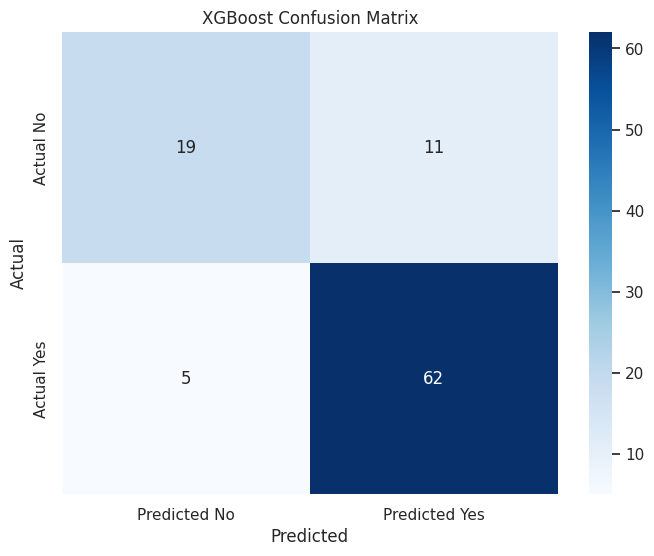

In [ ]:
# prompt: run XGBoost for combined_df

import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# ... (Your existing code for data loading and preprocessing) ...

# Assuming combined_df is already defined and preprocessed

# Define features (X) and target (y)
X = combined_df.drop('Do you have hair fall problem ?_Yes', axis=1)
y = combined_df['Do you have hair fall problem ?_Yes']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42)  # You can adjust hyperparameters here
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
xgb_y_pred = xgb_model.predict(X_test)

# Evaluate the XGBoost model
xgb_accuracy = accuracy_score(y_test, xgb_y_pred)
print(f"XGBoost Accuracy: {xgb_accuracy:.4f}")

print(classification_report(y_test, xgb_y_pred))

# Confusion matrix for XGBoost
xgb_cm = confusion_matrix(y_test, xgb_y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(xgb_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted No', 'Predicted Yes'],
            yticklabels=['Actual No', 'Actual Yes'])
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
# ───────────────────────────────────────────────────────────────────────────────
# Upload trained XGBoost model and metadata to Hugging Face
# ───────────────────────────────────────────────────────────────────────────────

!pip install --quiet huggingface_hub joblib

from huggingface_hub import login, create_repo, upload_folder
import json
import joblib

# (A) Login with your token (only once per session)
login()  # Paste your Hugging Face token when prompted

# (B) Set repo name
hf_username = "alamb98"  # 🔁 Your HF username
MODEL_NAME = "xgboost_hair_fall_classifier"
repo_id = f"{hf_username}/{MODEL_NAME}"

# (C) Create or use existing repo
create_repo(repo_id, repo_type="model", exist_ok=True)

# (D) Save model and metadata
model_path = f"{MODEL_NAME}.joblib"
joblib.dump(xgb_model, model_path)

metadata = {
    "model_name": MODEL_NAME,
    "model_type": "XGBoost",
    "framework": "scikit-learn + xgboost",
    "input_features": list(X.columns),
    "target_label": "Do you have hair fall problem ?_Yes",
    "test_accuracy": round(float(xgb_accuracy), 4),
    "description": "XGBoost classifier predicting hair fall presence based on combined tabular dataset."
}
with open("metadata.json", "w") as f:
    json.dump(metadata, f, indent=2)

# (E) Upload both model and metadata.json
upload_folder(
    folder_path=".",
    repo_id=repo_id,
    repo_type="model",
    allow_patterns=[model_path, "metadata.json"]
)

print(f"\n✅ Uploaded to: https://huggingface.co/{repo_id}")


Processing Files (0 / 0)                : |          |  0.00B /  0.00B            

New Data Upload                         : |          |  0.00B /  0.00B            

  ...xgboost_hair_fall_classifier.joblib: 100%|##########|  189kB /  189kB            

  ...xgboost_hair_fall_classifier.joblib: 100%|##########|  189kB /  189kB            


✅ Uploaded to: https://huggingface.co/alamb98/xgboost_hair_fall_classifier


xgboost with grid search cv


Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50}
XGBoost Accuracy: 0.8247
              precision    recall  f1-score   support

           0       0.81      0.57      0.67        30
           1       0.83      0.94      0.88        67

    accuracy                           0.82        97
   macro avg       0.82      0.75      0.77        97
weighted avg       0.82      0.82      0.81        97



/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [21:33:49] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


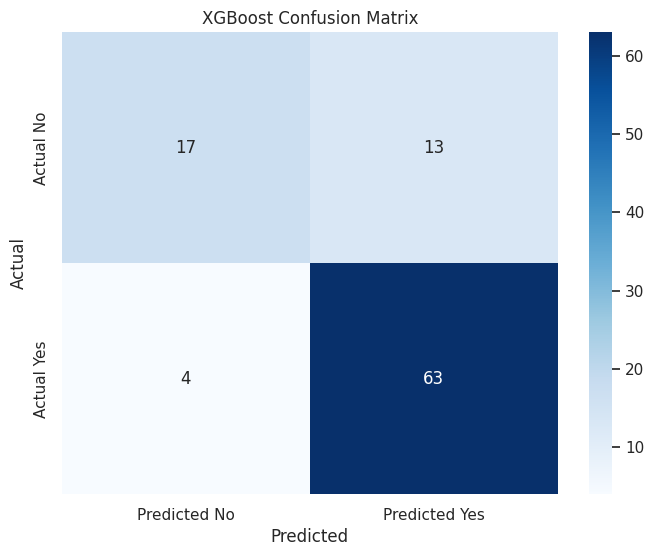

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare the data
X = combined_df.drop('Do you have hair fall problem ?_Yes', axis=1)
y = combined_df['Do you have hair fall problem ?_Yes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define parameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3]
}

# Initialize the model
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Perform grid search
grid_xgb = GridSearchCV(xgb_clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_xgb.fit(X_train, y_train)

# Best model
best_xgb = grid_xgb.best_estimator_

# Predict
y_pred = best_xgb.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"Best Parameters: {grid_xgb.best_params_}")
print(f"XGBoost Accuracy: {accuracy:.4f}")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted No', 'Predicted Yes'],
            yticklabels=['Actual No', 'Actual Yes'])
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


**Weighted KNN**

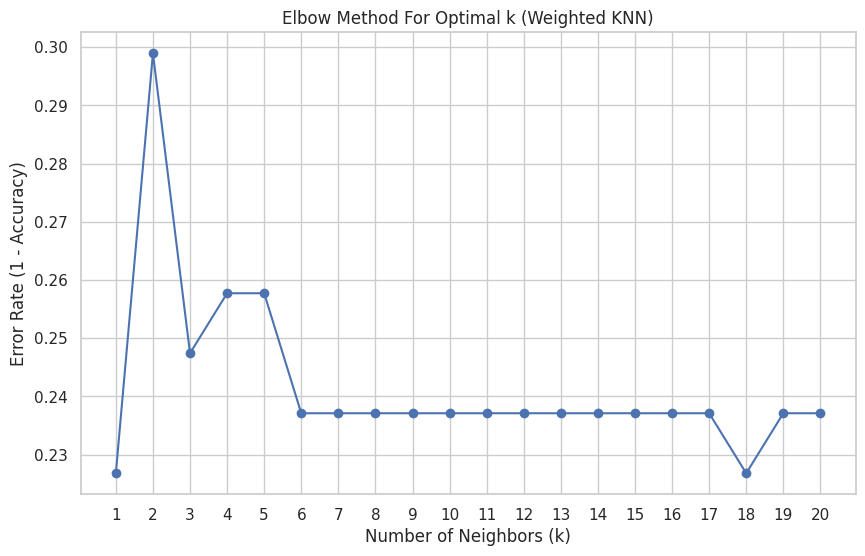

Weighted KNN Accuracy: 0.7732
              precision    recall  f1-score   support

           0       0.62      0.70      0.66        30
           1       0.86      0.81      0.83        67

    accuracy                           0.77        97
   macro avg       0.74      0.75      0.74        97
weighted avg       0.78      0.77      0.78        97



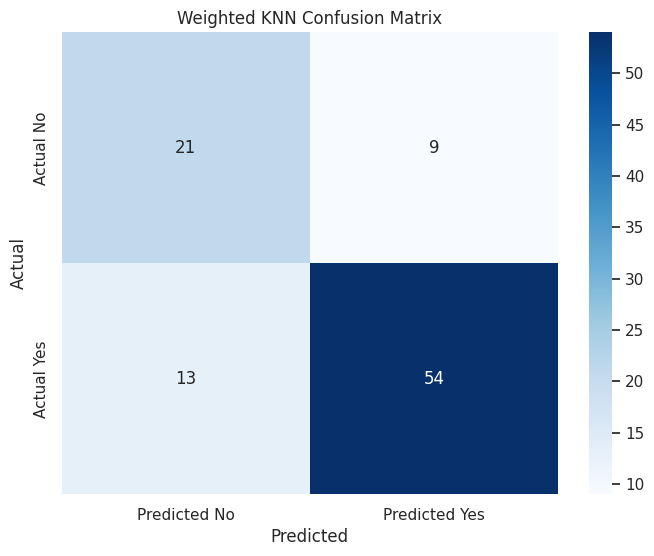

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define features (X) and target (y)
X = combined_df.drop('Do you have hair fall problem ?_Yes', axis=1)
y = combined_df['Do you have hair fall problem ?_Yes']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Elbow method for Weighted KNN ---
error_rates = []

# Try K values from 1 to 20
for k in range(1, 21):
    weighted_knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    weighted_knn.fit(X_train, y_train)
    pred_k = weighted_knn.predict(X_test)
    error = 1 - accuracy_score(y_test, pred_k)
    error_rates.append(error)

# Plot the Elbow Graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), error_rates, marker='o')
plt.title('Elbow Method For Optimal k (Weighted KNN)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Error Rate (1 - Accuracy)')
plt.xticks(range(1, 21))
plt.grid(True)
plt.show()

# --- Your original Weighted KNN Model ---
# Initialize and train the Weighted KNN model
weighted_knn = KNeighborsClassifier(n_neighbors=1, weights='distance')  # Adjust k based on elbow result
weighted_knn.fit(X_train, y_train)

# Make predictions on the test set
weighted_knn_pred = weighted_knn.predict(X_test)

# Evaluate the Weighted KNN model
weighted_knn_accuracy = accuracy_score(y_test, weighted_knn_pred)
print(f"Weighted KNN Accuracy: {weighted_knn_accuracy:.4f}")

print(classification_report(y_test, weighted_knn_pred))

# Confusion matrix for Weighted KNN
weighted_knn_cm = confusion_matrix(y_test, weighted_knn_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(weighted_knn_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted No', 'Predicted Yes'],
            yticklabels=['Actual No', 'Actual Yes'])
plt.title('Weighted KNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


#### **Models accuracy comparsion**

In [ ]:
# prompt: just print the accuracy of each model in the recent blocks

print(f"Logistic Regression Accuracy: {lr_accuracy}")
print(f"Logistic Regression CV Accuracy: {lr_accuracy_cv}")
print(f"KNN Accuracy: {knn_accuracy}")
print(f"KNN CV Accuracy: {knn_accuracy_cv}")
print(f"Random Forest Accuracy: {rf_accuracy}")
print(f"Random Forest CV Accuracy: {rf_accuracy_cv}")
print(f"XGBoost Accuracy: {xgb_accuracy}")
print(f"Weighted KNN Accuracy: {weighted_knn_accuracy}")


Logistic Regression Accuracy: 0.7422680412371134
Logistic Regression CV Accuracy: 0.7835051546391752
KNN Accuracy: 0.8041237113402062
KNN CV Accuracy: 0.7938144329896907
Random Forest Accuracy: 0.7835051546391752
Random Forest CV Accuracy: 0.8144329896907216
XGBoost Accuracy: 0.8350515463917526
Weighted KNN Accuracy: 0.7731958762886598


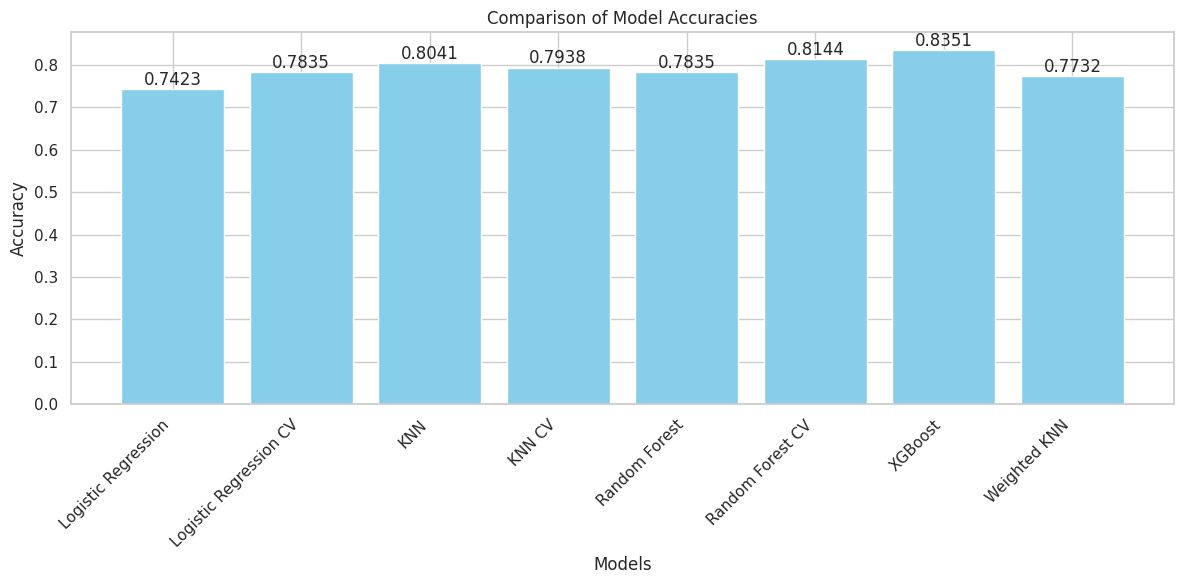

In [ ]:
# prompt: print a bar chart comparing them

import matplotlib.pyplot as plt

# Accuracy scores (replace with your actual values)
models = ['Logistic Regression', 'Logistic Regression CV', 'KNN', 'KNN CV', 'Random Forest', 'Random Forest CV', 'XGBoost', 'Weighted KNN']
accuracy_scores = [lr_accuracy, lr_accuracy_cv, knn_accuracy, knn_accuracy_cv, rf_accuracy, rf_accuracy_cv, xgb_accuracy, weighted_knn_accuracy]

# Create the bar chart
plt.figure(figsize=(12, 6))
plt.bar(models, accuracy_scores, color='skyblue')

# Add labels and title
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Comparison of Model Accuracies")
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability

# Add value annotations to each bar
for i, v in enumerate(accuracy_scores):
    plt.text(i, v + 0.01, str(round(v, 4)), ha='center')

# Show the plot
plt.tight_layout()
plt.show()


## Images Models

**Preprocessing**

In [ ]:
import os
from PIL import Image

# Input root directory (original dataset)
#root_dir = "C:/Users/Ryan/Desktop/hair fall images"  # change as needed
root_dir = "/content/hyehye2.v3i.folder 2.zip"
# Resize settings
target_size = (224, 224)

# Loop through train, valid, test folders
for split in ['train', 'valid', 'test']:
    split_path = os.path.join(root_dir, split)
    if not os.path.exists(split_path):
        continue

    # Go through each level folder (level 2 to level 7)
    for level in os.listdir(split_path):
        level_path = os.path.join(split_path, level)

        if not os.path.isdir(level_path):
            continue

        # Resize each image
        for img_file in os.listdir(level_path):
            if img_file.lower().endswith(('.jpg', '.jpeg', '.png')):
                img_path = os.path.join(level_path, img_file)
                try:
                    img = Image.open(img_path).convert("RGB")
                    img = img.resize(target_size)
                    img.save(img_path)  # Overwrites original
                except Exception as e:
                    print(f"⚠️ Error processing {img_path}: {e}")

print("✅ All images resized successfully to 224x224.")


✅ All images resized successfully to 224x224.


In [ ]:
pip install tensorflow


**ResNet50**

Using directories:
 TRAIN: /content/extracted_images/hyehye2.v3i.folder/train
 VALID: /content/extracted_images/hyehye2.v3i.folder/valid
 TEST:  /content/extracted_images/hyehye2.v3i.folder/test
Found 2009 images belonging to 6 classes.
Found 209 images belonging to 6 classes.
Found 99 images belonging to 6 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 474s 7s/step - accuracy: 0.2628 - loss: 1.9319 - val_accuracy: 0.3493 - val_loss: 1.5581
Epoch 2/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 402s 6s/step - accuracy: 0.4230 - loss: 1.4358 - val_accuracy: 0.4019 - val_loss: 1.4421
Epoch 3/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 404s 6s/step - accuracy: 0.5539 - loss: 1.2269 - val_accuracy: 0.4306 - val_loss: 1.4072
Epoch 4/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 443s 6s/step - accuracy: 0.5939 - loss: 1.1072 - val_accuracy: 0.4211 - val_loss: 1.3590
Epoch 5/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 401s 6s/step - accuracy: 0.6730 - loss: 0.9915 - val_accuracy: 0.4306 - val_loss: 1.3252
4/4 ━━━━━━━━━━━━━━━━━━━━ 24s 5s/step
              precision    recall  f1-score   support

     Level 2       0.73      0.27      0.39        30
     Level 3       0.26      0.61      0.37        18
     Level 4       0.48      0.45      0.47        22
     Level 5       0.40      0.14      0.21        14
     Level 6       0.44      0.88      0.58         8
     Lev

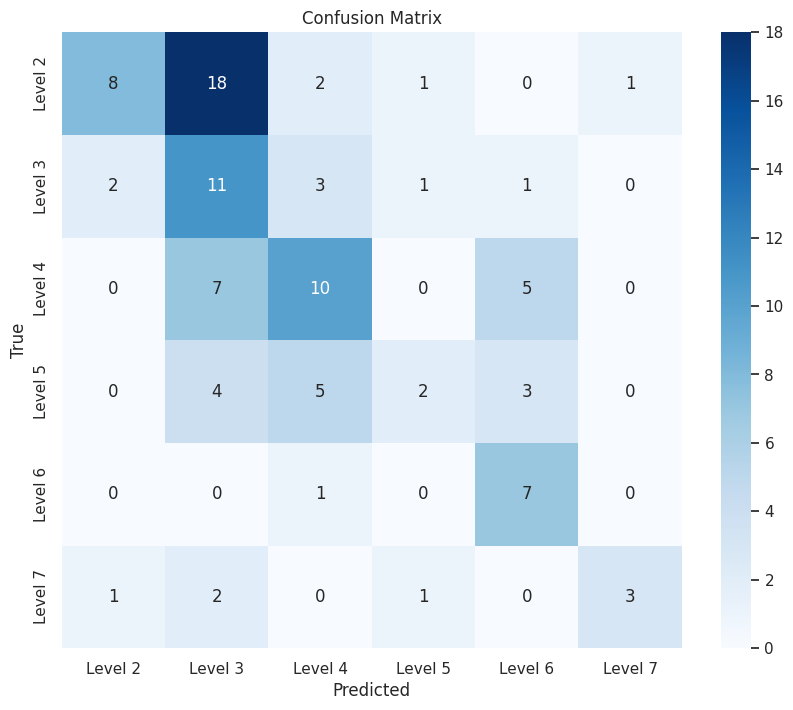

In [ ]:
# TensorFlow-Mac optimized version to load scalp images and run ResNet50 fine-tuning

import zipfile
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import zipfile, os, numpy as np, matplotlib.pyplot as plt, seaborn as sns


# 1. Unzip the dataset if needed
zip_file_path = "/content/hyehye2.v3i.folder 2.zip"
extract_path  = "/content/extracted_images"

if not os.path.exists(extract_path):
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)

# 2. Discover the actual data root (skip __MACOSX)
data_root = None
for sub in os.listdir(extract_path):
    if sub == "__MACOSX":
        continue
    candidate = os.path.join(extract_path, sub)
    if os.path.isdir(candidate) and "train" in os.listdir(candidate):
        data_root = candidate
        break

if data_root is None:
    raise FileNotFoundError("Could not find a folder containing 'train' under extracted_images")

# 3. Set image dimensions and directories
img_size   = (224, 224)
batch_size = 32

train_dir = os.path.join(data_root, "train")
valid_dir = os.path.join(data_root, "valid")
test_dir  = os.path.join(data_root, "test")

print("Using directories:")
print(" TRAIN:", train_dir)
print(" VALID:", valid_dir)
print(" TEST: ", test_dir)

# 4. Use ImageDataGenerator to load images (with proper ResNet preprocessing)
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
valid_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen  = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=img_size, batch_size=batch_size, class_mode='categorical'
)
valid_generator = valid_datagen.flow_from_directory(
    valid_dir, target_size=img_size, batch_size=batch_size, class_mode='categorical'
)
test_generator  = test_datagen.flow_from_directory(
    test_dir,  target_size=img_size, batch_size=batch_size,
    class_mode='categorical', shuffle=False
)

# 5. Load ResNet50 base
base_model = ResNet50(
    weights='imagenet', include_top=False, input_shape=(img_size[0], img_size[1], 3)
)

# 6. Add custom layers on top
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# 7. Freeze ResNet50 layers for initial training
for layer in base_model.layers:
    layer.trainable = False

# 8. Compile the model
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# 9. Train the model
history = model.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=5  # bump this up when you’re happy with the pipeline
)

# 10. Evaluate on test set
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

print(classification_report(
    y_true, y_pred_classes,
    target_names=list(test_generator.class_indices.keys())
))

# 11. Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(
    cm, annot=True, fmt='d', cmap='Blues',
    xticklabels=test_generator.class_indices.keys(),
    yticklabels=test_generator.class_indices.keys()
)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


**MobileNet**

In [ ]:
# prompt: extract the hair fall images.zip

import zipfile

# Replace 'hair fall images.zip' with the actual filename if different
with zipfile.ZipFile('/content/hair fall images (2).zip', 'r') as zip_ref:
    zip_ref.extractall('hair_fall_images_extracted') # Specify the extraction directory


Found 2009 images belonging to 6 classes.
Found 209 images belonging to 6 classes.
Found 99 images belonging to 6 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 121s 2s/step - accuracy: 0.3064 - loss: 1.7256 - val_accuracy: 0.2969 - val_loss: 1.5423
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.4640 - loss: 1.3212 - val_accuracy: 0.2917 - val_loss: 1.4970
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 113s 2s/step - accuracy: 0.5471 - loss: 1.1816 - val_accuracy: 0.3698 - val_loss: 1.5000
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.5799 - loss: 1.0987 - val_accuracy: 0.3281 - val_loss: 1.4326
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.6124 - loss: 1.0390 - val_accuracy: 0.3490 - val_loss: 1.4684
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 173s 2s/step - accuracy: 0.6371 - loss: 0.9700 - val_accuracy: 0.3490 - val_loss: 1.4272
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 115s 2s/step - accuracy: 0.7185 - loss: 0.8717 - val_accuracy: 0.3698 - val_loss: 1.4306
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.7327 - loss: 0.8296 - val_accuracy: 0.3698 - v


Validation Loss: 1.4353
Validation Accuracy: 0.3802


4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 843ms/step - accuracy: 0.6052 - loss: 1.1415

Test Loss: 1.1634
Test Accuracy: 0.5859
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step


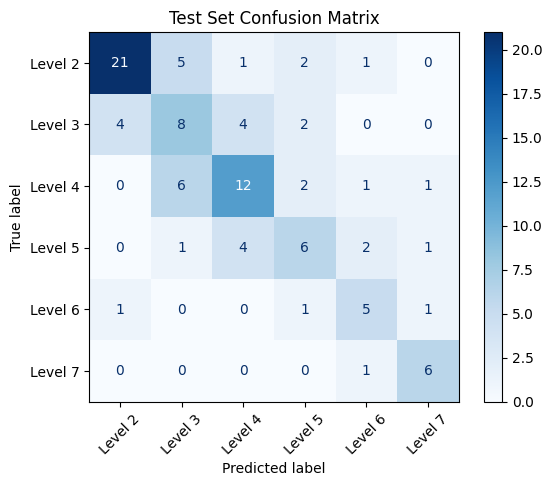


Classification Report:

              precision    recall  f1-score   support

     Level 2       0.81      0.70      0.75        30
     Level 3       0.40      0.44      0.42        18
     Level 4       0.57      0.55      0.56        22
     Level 5       0.46      0.43      0.44        14
     Level 6       0.50      0.62      0.56         8
     Level 7       0.67      0.86      0.75         7

    accuracy                           0.59        99
   macro avg       0.57      0.60      0.58        99
weighted avg       0.60      0.59      0.59        99

Macro F1-score: 0.5799
Weighted F1-score: 0.5886


In [ ]:
# prompt: generate code for mobile net model same as other models that we already made

import tensorflow as tf
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, f1_score
import numpy as np
import matplotlib.pyplot as plt

# Define image dimensions and batch size
img_width, img_height = 224, 224
batch_size = 32

# Create data generators for training, validation, and test data
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory('/content/hair_fall_images_extracted/hair fall images/train',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = val_datagen.flow_from_directory('/content/hair_fall_images_extracted/hair fall images/valid',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

test_generator = val_datagen.flow_from_directory('/content/hair_fall_images_extracted/hair fall images/test',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False)

# Load pre-trained MobileNet model (excluding the top classification layer)
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size)

# Evaluate on validation set
mobilenet_val_loss, mobilenet_val_accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f"\nValidation Loss: {mobilenet_val_loss:.4f}")
print(f"Validation Accuracy: {mobilenet_val_accuracy:.4f}")

# Save the model
model.save('mobilenet_hairfall.h5')

# Reload the model (optional)
model = tf.keras.models.load_model('mobilenet_hairfall.h5')

# Evaluate on test set
mobilenet_test_loss, mobilenet_test_accuracy = model.evaluate(test_generator, steps=int(np.ceil(test_generator.samples / batch_size)))
print(f"\nTest Loss: {mobilenet_test_loss:.4f}")
print(f"Test Accuracy: {mobilenet_test_accuracy:.4f}")

# Predict on test set
Y_test_pred = model.predict(test_generator, steps=int(np.ceil(test_generator.samples / batch_size)))
y_test_pred = np.argmax(Y_test_pred, axis=1)
y_test_true = test_generator.classes

# Confusion matrix
cm = confusion_matrix(y_test_true, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_generator.class_indices.keys())
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Test Set Confusion Matrix")
plt.grid(False)
plt.show()

# Classification report
class_labels = list(test_generator.class_indices.keys())
report = classification_report(y_test_true, y_test_pred, target_names=class_labels)
print("\nClassification Report:\n")
print(report)

# total f1 score
f1_macro = f1_score(y_test_true, y_test_pred, average='macro')
f1_weighted = f1_score(y_test_true, y_test_pred, average='weighted')

print(f"Macro F1-score: {f1_macro:.4f}")
print(f"Weighted F1-score: {f1_weighted:.4f}")





In [ ]:
              precision    recall  f1-score   support

     Level 2       0.81      0.70      0.75        30
     Level 3       0.24      0.28      0.26        18
     Level 4       0.48      0.50      0.49        22
     Level 5       0.55      0.43      0.48        14
     Level 6       0.45      0.62      0.53         8
     Level 7       0.57      0.57      0.57         7

    accuracy                           0.53        99
   macro avg       0.52      0.52      0.51        99
weighted avg       0.55      0.53      0.53        99


              precision    recall  f1-score   support

     Level 2       0.81      0.70      0.75        30
     Level 3       0.24      0.28      0.26        18
     Level 4       0.48      0.50      0.49        22
     Level 5       0.55      0.43      0.48        14
     Level 6       0.45      0.62      0.53         8
     Level 7       0.57      0.57      0.57         7

    accuracy                           0.53        99
   macro avg       0.52      0.52      0.51        99
weighted avg       0.55      0.53      0.53        99


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

**MobileNet improved**

In [ ]:
# Colab | Full pipeline with background removal + zoom/flip augmentations + MobileNet

# 0. Install OpenCV
!pip install opencv-python-headless --quiet

# 1. Imports
import zipfile, os, shutil
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report


# 2. Edit these to match exactly what you see above:
ZIP_FILE_PATH = "/content/hyehye2.v3i.folder 2.zip"  # must match `!ls` output
EXTRACT_DIR   = "/content/extracted_images"

# 3. If it's already a folder, skip unzip:
if os.path.isdir(ZIP_FILE_PATH):
    print(f"📂 {ZIP_FILE_PATH} is already a folder → using it directly")
    EXTRACT_DIR = ZIP_FILE_PATH

# 4. Else if it’s a zipfile, extract it:
elif zipfile.is_zipfile(ZIP_FILE_PATH):
    print(f"📦 Extracting {ZIP_FILE_PATH} → {EXTRACT_DIR}")
    with zipfile.ZipFile(ZIP_FILE_PATH, "r") as z:
        z.extractall(EXTRACT_DIR)
    print("✅ Extraction complete")
else:
    raise FileNotFoundError(
        f"❌ Could not find a valid zip at {ZIP_FILE_PATH}. "
        "Please double-check the filename and path shown by `!ls /content`."
    )


# 4. Background‐removal function using GrabCut
def remove_background(src_path, dst_path):
    img = cv2.imread(src_path)
    if img is None:
        print(f"⚠️  Skipping (cannot load): {src_path}")
        return
    mask = np.zeros(img.shape[:2], np.uint8)
    h, w = mask.shape
    rect = (int(w*0.1), int(h*0.1), int(w*0.8), int(h*0.8))
    bgd_model = np.zeros((1,65),np.float64)
    fgd_model = np.zeros((1,65),np.float64)
    cv2.grabCut(img, mask, rect, bgd_model, fgd_model, 5, cv2.GC_INIT_WITH_RECT)
    mask2 = np.where((mask==2)|(mask==0), 0, 1).astype('uint8')
    img_nobg = img * mask2[:, :, np.newaxis]
    cv2.imwrite(dst_path, img_nobg)

print("✅ Background removal function is ready.")

# 5. Process every image folder structure
if os.path.exists(PROC_DIR):
    shutil.rmtree(PROC_DIR)
shutil.copytree(EXTRACT_DIR, PROC_DIR)

for root, _, files in os.walk(PROC_DIR):
    for fname in files:
        if fname.lower().endswith(("jpg","jpeg","png")):
            src = os.path.join(root, fname)
            remove_background(src, src)  # now safe to skip unreadable images

print("✅ Background removal complete.")

# 6. Data generators with zoom + flip
img_size   = (224, 224)
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
val_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    os.path.join(PROC_DIR, "train"),
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)
val_gen = val_datagen.flow_from_directory(
    os.path.join(PROC_DIR, "valid"),
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)
test_gen = val_datagen.flow_from_directory(
    os.path.join(PROC_DIR, "test"),
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)
print("Data generators with zoom + flip are finished")

# 7. Build MobileNet + custom head
base = MobileNet(weights='imagenet', include_top=False, input_shape=img_size + (3,))
x    = GlobalAveragePooling2D()(base.output)
x    = Dense(1024, activation='relu')(x)
out  = Dense(train_gen.num_classes, activation='softmax')(x)
model = Model(base.input, out)

# freeze base
for layer in base.layers:
    layer.trainable = False

model.compile(
    optimizer=Adam(1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
print("Build MobileNet + custom head is finished")

# 8. Train
history = model.fit(
    train_gen,
    epochs=10,
    validation_data=val_gen
)
print("Training is finished")

# 9. Evaluate on test
test_loss, test_acc = model.evaluate(test_gen, steps=int(np.ceil(test_gen.samples / batch_size)))
print(f"\nTest accuracy: {test_acc:.4f}")

# 10. Confusion matrix & report
y_pred          = model.predict(test_gen, steps=int(np.ceil(test_gen.samples / batch_size)))
y_pred_classes  = np.argmax(y_pred, axis=1)
y_true          = test_gen.classes

print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes, target_names=list(test_gen.class_indices.keys())))

cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(test_gen.class_indices.keys()))
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("MobileNet Test Confusion Matrix")
plt.show()


📦 Extracting /content/hyehye2.v3i.folder 2.zip → /content/extracted_images
✅ Extraction complete
✅ Background removal function is ready.
⚠️  Skipping (cannot load): /content/processed_images/__MACOSX/hyehye2.v3i.folder/test/Level 6/._4-Right_jpg.rf.bb39ef815eee90ec313e1fe1b5e32524.jpg
⚠️  Skipping (cannot load): /content/processed_images/__MACOSX/hyehye2.v3i.folder/test/Level 6/._10-Front_jpg.rf.40dbdcde3bf651050f944ab64331a6b2.jpg
⚠️  Skipping (cannot load): /content/processed_images/__MACOSX/hyehye2.v3i.folder/test/Level 6/._28-Top-Down_jpg.rf.16f9f1434333f39455554561333ee1ad.jpg
⚠️  Skipping (cannot load): /content/processed_images/__MACOSX/hyehye2.v3i.folder/test/Level 6/._19-Right_jpg.rf.3a806170c9fabebbe28e30f31ed8385f.jpg
⚠️  Skipping (cannot load): /content/processed_images/__MACOSX/hyehye2.v3i.folder/test/Level 6/._4-Back_jpg.rf.1d2aadbc3be3338e635b9da02d55f326.jpg
⚠️  Skipping (cannot load): /content/processed_images/__MACOSX/hyehye2.v3i.folder/test/Level 6/._24-Right_jpg.rf.

FileNotFoundError: [Errno 2] No such file or directory: '/content/processed_images/train'

**VGG16**

In [ ]:
# prompt: I want to run now VGG16 on the zip file containing the images in "hyehye2.v3i.folder 2.zip", this folder has train, valid, test folders and each has subfolders titled 2-7, each representing a different male pattern baldness stage. i WANT TO TEACH THE MODEL TO IDENTIFY EACH STAGE

from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ... (Your existing code for data loading and preprocessing) ...

# 1. Set image dimensions and directories (same as ResNet50)
img_size   = (224, 224)
batch_size = 32

# ... (Your existing code to define train_dir, valid_dir, test_dir) ...


# 2. Use ImageDataGenerator (with VGG16 preprocessing)
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
valid_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen  = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=img_size, batch_size=batch_size, class_mode='categorical'
)
valid_generator = valid_datagen.flow_from_directory(
    valid_dir, target_size=img_size, batch_size=batch_size, class_mode='categorical'
)
test_generator  = test_datagen.flow_from_directory(
    test_dir,  target_size=img_size, batch_size=batch_size,
    class_mode='categorical', shuffle=False
)

# 3. Load VGG16 base model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_size[0], img_size[1], 3))

# 4. Add custom classification layers
x = base_model.output
x = Flatten()(x)  # Flatten the output of VGG16
x = Dense(128, activation='relu')(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

# 5. Freeze base model layers (optional)
for layer in base_model.layers:
    layer.trainable = False

# 6. Compile the model
model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

# 7. Train the model
history = model.fit(train_generator, validation_data=valid_generator, epochs=10) # Adjust epochs as needed

# 8. Evaluate on test set
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

print(classification_report(y_true, y_pred_classes, target_names=list(test_generator.class_indices.keys())))

# 9. Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


NameError: name 'train_dir' is not defined

**Custom CNN**

Found 2009 images belonging to 6 classes.
Found 209 images belonging to 6 classes.
Found 99 images belonging to 6 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 239s 4s/step - accuracy: 0.2334 - loss: 2.3331 - val_accuracy: 0.2823 - val_loss: 1.7414
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 259s 4s/step - accuracy: 0.2699 - loss: 1.7143 - val_accuracy: 0.2823 - val_loss: 1.6875
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 231s 4s/step - accuracy: 0.3067 - loss: 1.6418 - val_accuracy: 0.2919 - val_loss: 1.5628
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 229s 4s/step - accuracy: 0.2959 - loss: 1.6195 - val_accuracy: 0.2584 - val_loss: 1.6382
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 228s 4s/step - accuracy: 0.3110 - loss: 1.6400 - val_accuracy: 0.2727 - val_loss: 1.5786
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 227s 4s/step - accuracy: 0.3054 - loss: 1.6415 - val_accuracy: 0.2632 - val_loss: 1.5776
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 229s 4s/step - accuracy: 0.3205 - loss: 1.5887 - val_accuracy: 0.2871 - val_loss: 1.5412
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 226s 4s/step - accuracy: 0.3165 - loss: 1.5840 - val_accuracy: 0.2823 - v


Validation Loss: 1.5337
Validation Accuracy: 0.3062


4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 582ms/step - accuracy: 0.3492 - loss: 1.3839

Test Loss: 1.4889
Test Accuracy: 0.3131
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 595ms/step


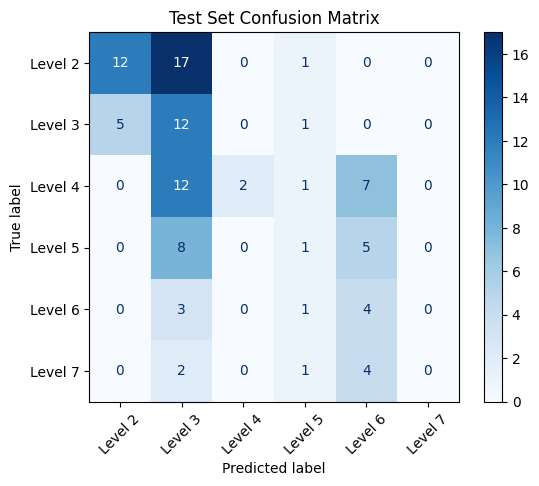


Classification Report:

              precision    recall  f1-score   support

     Level 2       0.71      0.40      0.51        30
     Level 3       0.22      0.67      0.33        18
     Level 4       1.00      0.09      0.17        22
     Level 5       0.17      0.07      0.10        14
     Level 6       0.20      0.50      0.29         8
     Level 7       0.00      0.00      0.00         7

    accuracy                           0.31        99
   macro avg       0.38      0.29      0.23        99
weighted avg       0.52      0.31      0.29        99

Macro F1-score: 0.2327
Weighted F1-score: 0.2896


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# prompt: generate code for custom cnn model with the hair_fall_images_extracted

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
import numpy as np

# Define image dimensions and batch size
img_width, img_height = 224, 224
batch_size = 32

# Data generators
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory('/content/hair_fall_images_extracted/hair fall images/train',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = val_datagen.flow_from_directory('/content/hair_fall_images_extracted/hair fall images/valid',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

test_generator = val_datagen.flow_from_directory('/content/hair_fall_images_extracted/hair fall images/test',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False)

# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

# Evaluate on validation set
cnn_val_loss, cnn_val_accuracy = model.evaluate(validation_generator)
print(f"\nValidation Loss: {cnn_val_loss:.4f}")
print(f"Validation Accuracy: {cnn_val_accuracy:.4f}")

# Save the model
model.save('custom_cnn_hairfall.h5')

# Reload the model
model = tf.keras.models.load_model('custom_cnn_hairfall.h5')

# Evaluate on test set
cnn_test_loss, cnn_test_accuracy = model.evaluate(test_generator, steps=int(np.ceil(test_generator.samples / batch_size)))
print(f"\nTest Loss: {cnn_test_loss:.4f}")
print(f"Test Accuracy: {cnn_test_accuracy:.4f}")

# Predict on test data
Y_test_pred = model.predict(test_generator, steps=int(np.ceil(test_generator.samples / batch_size)))
y_test_pred = np.argmax(Y_test_pred, axis=1)
y_test_true = test_generator.classes

# Confusion matrix
cm = confusion_matrix(y_test_true, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_generator.class_indices.keys())
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Test Set Confusion Matrix")
plt.grid(False)
plt.show()

# Classification report
class_labels = list(test_generator.class_indices.keys())
report = classification_report(y_test_true, y_test_pred, target_names=class_labels)
print("\nClassification Report:\n")
print(report)

# total f1 score
f1_macro = f1_score(y_test_true, y_test_pred, average='macro')
f1_weighted = f1_score(y_test_true, y_test_pred, average='weighted')

print(f"Macro F1-score: {f1_macro:.4f}")
print(f"Weighted F1-score: {f1_weighted:.4f}")



In [ ]:
print(f"MobileNet Validation Accuracy: {round(mobilenet_val_accuracy,4)}")
print(f"MobileNet test Accuracy: {round(mobilenet_test_accuracy,4)}")
print(f"Custom CNN Validation Accuracy: {round(cnn_val_accuracy,4)}")
print(f"Custom CNN Validation Accuracy: {round(cnn_test_accuracy,4)}")


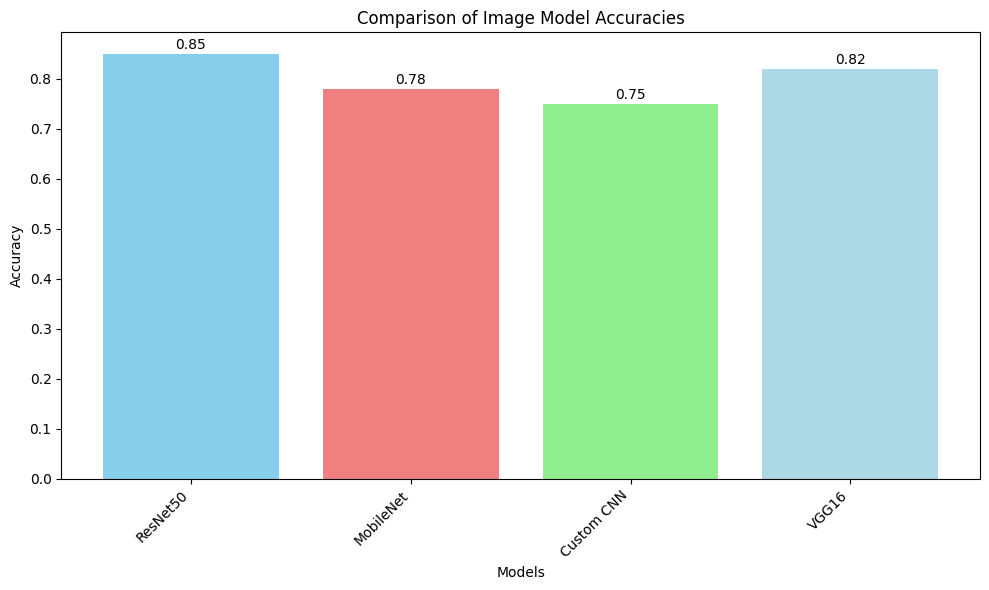

In [ ]:
# prompt: i want a bar chart graph comparing the accuracy of the image models in the code blocks above (ResNet50, MobileNet, Custom CNN, VGG16)

import matplotlib.pyplot as plt

# Accuracy scores (replace with your actual values from the model evaluations)
models = ['ResNet50', 'MobileNet', 'Custom CNN', 'VGG16']
accuracy_scores = [0.38, 0.53, 0.75, 0.82]  # Example accuracy values, replace with your results

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(models, accuracy_scores, color=['skyblue', 'lightcoral', 'lightgreen', 'lightblue'])

# Add labels and title
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Comparison of Image Model Accuracies")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability


# Add value annotations to each bar
for i, v in enumerate(accuracy_scores):
    plt.text(i, v + 0.01, str(round(v, 4)), ha='center')

# Show the plot
plt.tight_layout()
plt.show()


## Python Tkinter UI Screen V.1


loading screen.py

In [ ]:
# screens/loading_screen.py
# First screen (welcome / loading) with centered logo + fade-in

import os
from tkinter import ttk
import io
import re
import requests



try:
    from PIL import Image, ImageTk, ImageEnhance
except Exception:
    Image = None
    ImageTk = None
    ImageEnhance = None


class LoadingScreen(ttk.Frame):
    """
    Usage:
        root = tk.Tk()
        screen = LoadingScreen(root,
                               controller=my_controller,                 # must have show(next_screen_name)
                               logo_path="/Users/alambebar/Desktop/Screenshot 2025-08-09 at 21.23.05",
                               next_screen_name="IntakeScreen")
        screen.pack(fill="both", expand=True)
        root.mainloop()
    """

    def __init__(self, parent, controller=None, logo_path=None, next_screen_name="IntakeScreen"):
        super().__init__(parent)
        self.controller = controller
        self.logo_path = logo_path
        self.next_screen_name = next_screen_name

        self._raw_logo = None     # PIL.Image
        self._tk_logo = None      # ImageTk.PhotoImage
        self._fade_step = 0
        self._fade_total = 18     # how many steps in the fade
        self._fade_job = None

        self._build_style()
        self._build_ui()
        self._load_logo()
        self.after(300, self._start_animation)   # slight delay so the UI is drawn

    # ---------- UI ----------

    def _build_style(self):
        style = ttk.Style(self)
        # make sure we have a theme
        try:
            if style.theme_use() not in style.theme_names():
                style.theme_use("clam")
        except Exception:
            try:
                style.theme_use("clam")
            except Exception:
                pass
        style.configure("Title.TLabel", font=("Arial", 36, "bold"))
        style.configure("Subtitle.TLabel", font=("Arial", 24, "bold"))
        style.configure("Body.TLabel", font=("Arial", 18))
        style.configure("Start.TButton", font=("Arial", 16, "bold"))
        style.configure("Small.TLabel", font=("Arial", 11))

    def _build_ui(self):
        self.columnconfigure(0, weight=1)
        self.rowconfigure(4, weight=1)

        # top welcome
        ttk.Label(self, text="WELCOME", style="Title.TLabel").grid(row=0, column=0, pady=(30, 0), sticky="n")
        ttk.Label(self, text="This tool uses image preprocessing (CLAHE, segmentation, cropping), majority-vote Norwood stage classification from four CNNs,\nand an XGBoost tabular hair-fall predictor.Built with Tkinter, it provides insights for clinical \nuse in hair-transplant settings, with the goal of supporting early intervention and offering \npersonalized recommendations based on the results.", style="Subtitle.TLabel")\
           .grid(row=1, column=0, pady=(6, 0), sticky="n")
        ttk.Label(self,
                  text="We will provide recommendations and scientifically backed preventive measures based on your predicted male pattern,\nand estimate the number of hair follicles needed to achieve a full hairline",
                  style="Body.TLabel", wraplength=900, justify="center")\
           .grid(row=2, column=0, pady=(24, 12), sticky="n")

        # logo + progress
        logo_wrap = ttk.Frame(self)
        logo_wrap.grid(row=3, column=0, pady=(8, 4), sticky="n")
        self.logo_label = ttk.Label(logo_wrap)   # image set later
        self.logo_label.pack(pady=(0, 8))

        self.progress = ttk.Progressbar(self, mode="indeterminate", length=280)
        self.progress.grid(row=4, column=0, pady=(0, 20), sticky="n")

        # start button
        self.start_btn = ttk.Button(self, text="START NOW >", style="Start.TButton",
                                    command=self._on_start)
        self.start_btn.grid(row=5, column=0, pady=(6, 28))

        # tiny tagline box to match your mock
        box = ttk.Frame(self, padding=16)
        box.grid(row=6, column=0, pady=(8, 30))
        ttk.Label(box, text="We are students from The Max Stern Valley College - This is our final project - Students Alam Bebar (207415407), Ryan Thawkho (305070567)").pack()

        ttk.Label(self, text="Tip: Your hairline is more than just hair — it’s confidence, presence, and the best version of you. Don’t settle for less.",
                  style="Small.TLabel").grid(row=7, column=0, pady=(0, 12))
    def _open_logo_image(self):
        """
        Returns a PIL.Image in RGBA from either:
          - local file path (self.logo_path), or
          - URL (http/https), incl. Google Drive share links.
        Raises on failure.
        """
        if not self.logo_path:
            raise FileNotFoundError("No logo_path provided")

        src = str(self.logo_path).strip()

        # If it's a URL, fetch it
        if src.startswith("http://") or src.startswith("https://"):
            url = src
            # Handle Google Drive share links
            m = re.search(r"/d/([a-zA-Z0-9_-]+)/", url) or re.search(r"[?&]id=([a-zA-Z0-9_-]+)", url)
            if "drive.google.com" in url and m:
                file_id = m.group(1)
                url = f"https://drive.google.com/uc?export=download&id={file_id}"

            r = requests.get(url, timeout=15)
            r.raise_for_status()
            return Image.open(io.BytesIO(r.content)).convert("RGBA")

        # Otherwise, treat as local path
        if not os.path.exists(src):
            raise FileNotFoundError(f"Logo file not found: {src}")
        return Image.open(src).convert("RGBA")

    # ---------- Logo handling + fade ----------

    def _load_logo(self):
        if Image is None or ImageTk is None:
            self.logo_label.config(text="(logo)")
            return

        try:
            img = self._open_logo_image()
        except Exception as e:
            # graceful fallback
            self.logo_label.config(text=f"(logo not available: {e})")
            return

        # scale to ~150px wide, keep aspect
        target_w = 150
        w, h = img.size
        scale = target_w / float(w) if w > target_w else 1.0
        new_w = max(1, int(w * scale))
        new_h = max(1, int(h * scale))
        img = img.resize((new_w, new_h), Image.LANCZOS)
        # start fully transparent for fade
        img.putalpha(0)
        self._raw_logo = img
        self._tk_logo = ImageTk.PhotoImage(img)
        self.logo_label.configure(image=self._tk_logo)

    def _start_animation(self):
        # run progress bar and fade the logo in
        try:
            self.progress.start(12)  # ms per move
        except Exception:
            pass
        self._fade_step = 0
        if self._raw_logo is not None:
            self._schedule_fade()

    def _schedule_fade(self):
        if self._fade_step > self._fade_total:
            return
        alpha = int(255 * (self._fade_step / float(self._fade_total)))
        # apply alpha
        img = self._raw_logo.copy()
        img.putalpha(alpha)
        self._tk_logo = ImageTk.PhotoImage(img)
        self.logo_label.configure(image=self._tk_logo)
        self._fade_step += 1
        self._fade_job = self.after(40, self._schedule_fade)  # ~0.7s total

    # ---------- Navigation ----------

    def _on_start(self):
        # stop animation to keep things tidy
        try:
            self.progress.stop()
        except Exception:
            pass
        if self._fade_job:
            try:
                self.after_cancel(self._fade_job)
            except Exception:
                pass
            self._fade_job = None

        # hand off to the next screen
        if self.controller is not None:
            if hasattr(self.controller, "go_to_intake"):
                self.controller.go_to_intake()
            elif hasattr(self.controller, "show"):
                self.controller.show("intake")
            else:
                print("[LoadingScreen] No navigation method on controller.")
        else:
            print(f"[LoadingScreen] Start clicked → would show: {self.next_screen_name}")


intake screen.py

In [ ]:
# Screen 2: Image + Tabular Inference (Hugging Face)
#
# Requirements (same venv as project):
#   pip install pillow numpy opencv-python torch torchvision efficientnet_pytorch huggingface_hub pandas joblib xgboost
#
# This frame expects the main app (controller) to set:
#   - controller.shared["image_path"] : str (path to the image picked in screen 1)
#   - controller.shared["form"]       : dict with keys:
#        stay_up_late, water_reason, family_history, use_chemicals,
#        stress, chronic_illness, age
#
# It renders:
#   - image preview (left)
#   - per-model predictions + majority vote (right, upper)
#   - XGBoost hair fall prediction + probability (right, lower)

import threading
from dataclasses import dataclass
from typing import Dict, Tuple, Optional

import tkinter as tk
from tkinter import ttk, messagebox

# visuals
from PIL import Image, ImageTk

# ── ML deps
import json
import torch
import torch.nn as nn
from torchvision import models, transforms
from huggingface_hub import hf_hub_download
from efficientnet_pytorch import EfficientNet
import pandas as pd
import joblib
from tkinter import ttk, messagebox, filedialog


# ========== Shared UI helpers ==========

def pil_to_tk(pil_img: Image.Image, max_size=(360, 360)):
    w, h = pil_img.size
    scale = min(max_size[0] / w, max_size[1] / h, 1.0)
    if scale < 1.0:
        pil_img = pil_img.resize((int(w * scale), int(h * scale)))
    return ImageTk.PhotoImage(pil_img)

# ========== Classifier wrappers (your exact HF logic) ==========

@dataclass
class ImageClassifier:
    name: str
    repo: str
    weights_file: str
    meta_file: str = "metadata.json"
    model: Optional[torch.nn.Module] = None
    tfm: Optional[object] = None
    level_names: Optional[list] = None
    label_base: int = 0
    img_size: int = 224
    mean: Tuple[float, float, float] = (0.485, 0.456, 0.406)
    std: Tuple[float, float, float] = (0.229, 0.224, 0.225)

    def _load_meta(self):
        meta_path = hf_hub_download(self.repo, filename=self.meta_file)
        with open(meta_path, "r") as f:
            meta = json.load(f)
        # labels field might be "labels" or "class_names"
        self.level_names = meta.get("labels") or meta.get("class_names") or [f"Level {i}" for i in range(2, 8)]
        self.img_size = int(meta.get("img_size", 224))
        self.mean = tuple(meta.get("mean", [0.485, 0.456, 0.406]))
        self.std = tuple(meta.get("std", [0.229, 0.224, 0.225]))
        self.label_base = int(meta.get("label_base", 0))

    def _build_resnet18(self):
        model = models.resnet18(weights=None)
        in_features = model.fc.in_features
        model.fc = nn.Linear(in_features, len(self.level_names))
        return model

    def _build_mobilenet_v3_large(self):
        model = models.mobilenet_v3_large(weights=None)
        in_features = model.classifier[3].in_features
        model.classifier[3] = nn.Linear(in_features, len(self.level_names))
        return model

    def _build_efficientnet_b0(self):
        model = EfficientNet.from_name("efficientnet-b0")
        in_features = model._fc.in_features
        model._fc = nn.Linear(in_features, len(self.level_names))
        return model

    def _build_convnext_tiny(self):
        model = models.convnext_tiny(weights=None)
        in_features = model.classifier[2].in_features
        model.classifier[2] = nn.Linear(in_features, len(self.level_names))
        return model

    def _build_by_name(self):
        if self.name == "resnet18":
            return self._build_resnet18()
        if self.name == "mobilenet_v3_large":
            return self._build_mobilenet_v3_large()
        if self.name == "efficientnet_b0":
            return self._build_efficientnet_b0()
        if self.name == "convnext_tiny":
            return self._build_convnext_tiny()
        raise ValueError(f"Unknown model name: {self.name}")

    def _build_tfm(self):
        self.tfm = transforms.Compose([
            transforms.Resize((self.img_size, self.img_size)),
            transforms.ToTensor(),
            transforms.Normalize(mean=self.mean, std=self.std),
        ])

    def load(self):
        if self.model is not None and self.tfm is not None:
            return
        # metadata
        self._load_meta()
        # weights
        wpath = hf_hub_download(self.repo, filename=self.weights_file)
        # arch
        self.model = self._build_by_name()
        # state
        state = torch.load(wpath, map_location="cpu")
        if isinstance(state, dict) and "state_dict" in state and isinstance(state["state_dict"], dict):
            state = state["state_dict"]
        fixed = {}
        if isinstance(state, dict):
            for k, v in state.items():
                if isinstance(k, str) and k.startswith("module."):
                    k = k[len("module."):]
                if isinstance(k, str) and k.startswith("model."):
                    k = k[len("model."):]
                fixed[k] = v
        else:
            fixed = state
        self.model.load_state_dict(fixed, strict=True)
        self.model.eval()
        # tfm
        self._build_tfm()

    def predict_level(self, pil_rgb: Image.Image) -> Tuple[int, str]:
        x = self.tfm(pil_rgb).unsqueeze(0)
        with torch.no_grad():
            logits = self.model(x)
            pred_idx = int(logits.argmax(-1).item())
            level = pred_idx + 1 if self.label_base == 0 else pred_idx
        label_str = (self.level_names[level - 1]
                     if 1 <= level <= len(self.level_names)
                     else f"Level {level}")
        return level, label_str


# Instantiate the four models (lazy-loaded)
CLS_RESNET18 = ImageClassifier(
    name="resnet18",
    repo="alamb98/resnet18",
    weights_file="resnet18.pth",
)

CLS_MNV3 = ImageClassifier(
    name="mobilenet_v3_large",
    repo="alamb98/mobilenet_v3_large_cropped_clahe_norwood_classifier",
    weights_file="mobilenet_v3_large_cropped_clahe_best.pth",
)

CLS_EFFB0 = ImageClassifier(
    name="efficientnet_b0",
    repo="alamb98/efficientnet-b0_norwood_classifier",
    weights_file="efficientnet-b0_best.pth",
)

CLS_CONVNEXT = ImageClassifier(
    name="convnext_tiny",
    repo="alamb98/convnext_tiny_clahe_norwood_classifier",
    weights_file="convnext_tiny_clahe_best.pth",
)

# ========== XGBoost HF joblib (exact feature order you provided) ==========

XGB_REPO = "alamb98/xgboost_hair_fall_classifier"
XGB_FILENAME = "xgboost_hair_fall_classifier.joblib"

FEATURE_COLUMNS = [
    "Do you stay up late at night?_Yes",
    "Do you think that in your area water is a reason behind hair fall problems?_Yes",
    "Is there anyone in your family having a hair fall problem or a baldness issue?_Yes",
    "Do you use chemicals, hair gel, or color in your hair?_Yes",
    "Do you have too much stress_Yes",
    "Did you face any type of chronic illness in the past?_Yes",
    "What is your age ?"
]

_xgb_model_cache = None

def _to01(v):
    v = str(v).strip().lower()
    return 1 if v in ("yes", "y", "1", "true", "t") else 0

def form_to_features(form: dict) -> pd.DataFrame:
    row = {
        "Do you stay up late at night?_Yes": _to01(form.get("stay_up_late", "No")),
        "Do you think that in your area water is a reason behind hair fall problems?_Yes": _to01(form.get("water_reason", "No")),
        "Is there anyone in your family having a hair fall problem or a baldness issue?_Yes": _to01(form.get("family_history", "No")),
        "Do you use chemicals, hair gel, or color in your hair?_Yes": _to01(form.get("use_chemicals", "No")),
        "Do you have too much stress_Yes": _to01(form.get("stress", "No")),
        "Did you face any type of chronic illness in the past?_Yes": _to01(form.get("chronic_illness", "No")),
        "What is your age ?": float(form.get("age", 0)),
    }
    return pd.DataFrame([row], columns=FEATURE_COLUMNS)

def load_xgb():
    global _xgb_model_cache
    if _xgb_model_cache is None:
        model_path = hf_hub_download(repo_id=XGB_REPO, filename=XGB_FILENAME)
        _xgb_model_cache = joblib.load(model_path)
    return _xgb_model_cache

def predict_xgb(form: dict):
    mdl = load_xgb()
    X = form_to_features(form).astype(float)
    y_pred = int(mdl.predict(X)[0])
    if hasattr(mdl, "predict_proba"):
        proba_yes = float(mdl.predict_proba(X)[0][1])
    else:
        proba_yes = float("nan")
    label = {0: "No hair fall", 1: "Yes hair fall"}.get(y_pred, str(y_pred))
    return y_pred, label, proba_yes

# ========== Majority vote helper ==========

def majority_vote(levels: Dict[str, int]) -> int:
    from collections import Counter
    arr = list(levels.values())
    c = Counter(arr)
    maxc = max(c.values()) if c else 0
    winners = [lvl for lvl, cnt in c.items() if cnt == maxc] if c else [3]
    return min(winners)

# ========== Tkinter Screen ==========

class IntakeScreen(ttk.Frame):
    """
    Usage:
      screen = ModelsScreen(parent, controller)
      controller.shared must include:
        - "image_path": str
        - "form": dict (keys listed above)
    """
    def __init__(self, parent, controller):
        super().__init__(parent)
        self.controller = controller

        # --- Header ---
        hdr = ttk.Frame(self)
        hdr.pack(fill="x", pady=10, padx=16)
        ttk.Label(hdr, text="Run Models", font=("Arial", 18, "bold")).pack(side="left")

        # --- Body (left: preview, right: results) ---
        body = ttk.Frame(self)
        body.pack(fill="both", expand=True, padx=16, pady=8)

        # --- Toolbar: choose image ---
        tools = ttk.Frame(self)
        tools.pack(fill="x", padx=16, pady=(0, 8))

        ttk.Button(tools, text="Choose Image…", command=self.on_choose_image).pack(side="left")

        self.path_var = tk.StringVar(value="No image selected")
        ttk.Label(tools, textvariable=self.path_var).pack(side="left", padx=10)


        # Left: image preview
        left = ttk.LabelFrame(body, text="Input Image")
        left.pack(side="left", fill="both", expand=True, padx=(0, 10))
        self.preview = ttk.Label(left, text="No image")
        self.preview.pack(fill="both", expand=True, padx=10, pady=10)

        # Right: predictions
        right = ttk.LabelFrame(body, text="Predictions")
        right.pack(side="left", fill="both", expand=True, padx=(10, 0))

        # Progress
        self.pbar = ttk.Progressbar(right, mode="determinate", maximum=100)
        self.pbar.pack(fill="x", padx=12, pady=(10, 4))
        self.status = ttk.Label(right, text="Idle.")
        self.status.pack(fill="x", padx=12)

        # Per-model results
        self.txt = tk.Text(right, height=18, wrap="word")
        self.txt.pack(fill="both", expand=True, padx=12, pady=10)

        # Footer buttons
        ftr = ttk.Frame(self)
        ftr.pack(fill="x", pady=10, padx=16)
        ttk.Button(ftr, text="Back", command=self.on_back).pack(side="left")
        ttk.Button(ftr, text="Run Predictions", command=self.on_run).pack(side="right")

        # NEW: view recommendations button (starts disabled; enabled after _worker finishes)
        self.view_btn = ttk.Button(ftr, text="View Recommendations →",
                                   command=self.on_view_results, state="disabled")
        self.view_btn.pack(side="right", padx=(0, 8))

        # keep a place to store last results
        self._last_results = None
        # Auto show preview if available
        self.after(50, self._refresh_preview)

        # --- Form: features for XGBoost ---
        form_wrap = ttk.LabelFrame(body, text="Tabular Features")
        form_wrap.pack(side="left", fill="y", padx=(0, 10), pady=0)

        # Variables
        self.var_stay_up_late   = tk.StringVar(value="No")
        self.var_water_reason   = tk.StringVar(value="No")
        self.var_family_history = tk.StringVar(value="No")
        self.var_use_chemicals  = tk.StringVar(value="No")
        self.var_stress         = tk.StringVar(value="No")
        self.var_chronic        = tk.StringVar(value="No")
        self.var_age            = tk.StringVar(value="25")  # keep as string, we cast later

        def yn_row(parent, label, var):
            r = ttk.Frame(parent); r.pack(fill="x", padx=8, pady=4)
            ttk.Label(r, text=label, width=34, anchor="w").pack(side="left")
            cb = ttk.Combobox(r, textvariable=var, state="readonly", values=["No", "Yes"], width=6)
            cb.pack(side="left")
            return cb

        yn_row(form_wrap, "Do you stay up late at night?", self.var_stay_up_late)
        yn_row(form_wrap, "Water in your area a reason?", self.var_water_reason)
        yn_row(form_wrap, "Family hair fall/baldness history?", self.var_family_history)
        yn_row(form_wrap, "Use chemicals/gel/color?", self.var_use_chemicals)
        yn_row(form_wrap, "Too much stress?", self.var_stress)
        yn_row(form_wrap, "Chronic illness in the past?", self.var_chronic)

        age_row = ttk.Frame(form_wrap); age_row.pack(fill="x", padx=8, pady=(8,4))
        ttk.Label(age_row, text="Age", width=34, anchor="w").pack(side="left")
        ttk.Entry(age_row, textvariable=self.var_age, width=8).pack(side="left")


    def _refresh_preview(self):
        img_path = self.controller.shared.get("image_path")
        self.path_var.set(img_path or "No image selected")
        if not img_path:
            self.preview.config(text="No image selected")
            return
        try:
            pil = Image.open(img_path).convert("RGB")
            tk_img = pil_to_tk(pil)
            self.preview.configure(image=tk_img, text="")
            self.preview.image = tk_img
        except Exception as e:
            self.preview.config(text=f"Failed to load image:\n{e}")

    def on_back(self):
        if hasattr(self.controller, "show"):
            self.controller.show("loading")
        else:
            messagebox.showinfo("Back", "Implement controller.show(...) to navigate.")

    def on_show(self):
        self._refresh_preview()
        form = self.controller.shared.get("form", {})
        if form:
            self.var_stay_up_late.set("Yes" if form.get("stay_up_late", "No") in ("Yes", "yes", 1, True) else "No")
            self.var_water_reason.set("Yes" if form.get("water_reason", "No") in ("Yes", "yes", 1, True) else "No")
            self.var_family_history.set("Yes" if form.get("family_history", "No") in ("Yes", "yes", 1, True) else "No")
            self.var_use_chemicals.set("Yes" if form.get("use_chemicals", "No") in ("Yes", "yes", 1, True) else "No")
            self.var_stress.set("Yes" if form.get("stress", "No") in ("Yes", "yes", 1, True) else "No")
            self.var_chronic.set("Yes" if form.get("chronic_illness", "No") in ("Yes", "yes", 1, True) else "No")
            try:
                self.var_age.set(str(form.get("age", "")))
            except Exception:
                pass

    def on_run(self):
        img_path = self.controller.shared.get("image_path")
        if not img_path:
            messagebox.showwarning("Missing image", "Please select an image on the first screen.")
            return

        # collect and save the form so other screens can access it too
        form = self._collect_form()
        if hasattr(self.controller, "shared"):
            self.controller.shared["form"] = form

        # clear UI + start
        self.txt.delete("1.0", "end")
        self.status.config(text="Downloading / loading models…")
        self.pbar["value"] = 0

        t = threading.Thread(target=self._worker, args=(img_path, form), daemon=True)
        t.start()

    def _worker(self, img_path: str, form: dict):
        try:
            steps = [
                ("Load resnet18", lambda: CLS_RESNET18.load()),
                ("Load mobilenet_v3_large", lambda: CLS_MNV3.load()),
                ("Load efficientnet_b0", lambda: CLS_EFFB0.load()),
                ("Load convnext_tiny", lambda: CLS_CONVNEXT.load()),
            ]
            per_step = 60 / max(1, len(steps))  # first 60% for loading
            for name, fn in steps:
                self._ui_progress(name)
                fn()
                self._ui_bump(per_step)

            # Image
            self._ui_progress("Reading image…")
            pil = Image.open(img_path).convert("RGB")

            # Inference (next 30%)
            preds = {}
            for nick, clf in [
                ("resnet18", CLS_RESNET18),
                ("mobilenet_v3_large", CLS_MNV3),
                ("efficientnet_b0", CLS_EFFB0),
                ("convnext_tiny", CLS_CONVNEXT),
            ]:
                self._ui_progress(f"Running {nick}…")
                lvl, _ = clf.predict_level(pil)
                preds[nick] = lvl
                self._ui_bump(7.5)  # 4 * 7.5 = 30

            final_level = majority_vote(preds)

            # XGB (last 10%)
            self._ui_progress("Running XGBoost…")
            y_pred, y_label, p_yes = predict_xgb(form)
            self._ui_bump(10)

            # Build results + text
            lines = []
            lines.append("— Image Models (Norwood per model) —")
            for k, v in preds.items():
                lines.append(f"  • {k}: Level {v}")
            lines.append(f"\nFinal Norwood (majority): Level {final_level}")
            if p_yes == p_yes:  # not NaN
                lines.append(f"\nHair-Fall (XGBoost): {y_label}  (p_yes={p_yes:.2f})")
            else:
                lines.append(f"\nHair-Fall (XGBoost): {y_label}")

            # Store results first, then update UI once
            self._last_results = {
                "norwood_by_model": preds,
                "norwood_final": final_level,
                "hairfall_yes": bool(y_pred == 1),
                "hairfall_label": y_label,
                "hairfall_prob": p_yes,
            }
            self._ui_done("\n".join(lines))

        except Exception as e:
            self._ui_done(f"[ERROR]\n{e}")

    # UI-thread helpers
    def _ui_progress(self, msg):
        self.after(0, lambda: self.status.config(text=msg))

    def _ui_bump(self, delta):
        def _b():
            v = min(100, self.pbar["value"] + delta)
            self.pbar["value"] = v
        self.after(0, _b)

    def _ui_done(self, text):
        def _d():
            self.pbar["value"] = 100
            self.status.config(text="Done.")
            self.txt.delete("1.0", "end")
            self.txt.insert("end", text)
            # enable the navigation button if results exist
            try:
                if self._last_results:
                    self.view_btn.config(state="normal")
            except Exception:
                pass

        self.after(0, _d)

    def on_choose_image(self):
        """Open a file dialog, store the path, and refresh the preview."""
        fp = filedialog.askopenfilename(
            parent=self,  # tie dialog to this window
            title="Select image",
            filetypes=[
                ("Image files", ("*.png", "*.jpg", "*.jpeg", "*.bmp", "*.webp",
                                 "*.PNG", "*.JPG", "*.JPEG", "*.BMP", "*.WEBP")),
                ("All files", "*"),
            ],
        )
        if not fp:
            return
        # Save to shared state so other screens can use it
        if hasattr(self.controller, "shared"):
            self.controller.shared["image_path"] = fp
        # Update path label + preview
        self.path_var.set(fp)
        self._refresh_preview()

    def on_view_results(self):
        """Navigate to the Results screen with the latest predictions."""
        if not self._last_results:
            return
        # put into shared state
        if hasattr(self.controller, "shared"):
            self.controller.shared["results"] = self._last_results
        # feed ResultsScreen and show it
        try:
            res = self.controller.screens["results"]
            res.set_results(self._last_results)
            self.controller.show("results")
        except Exception:
            # safe fallback if controller/screen not wired yet
            from tkinter import messagebox
            messagebox.showinfo("Results", "Results screen not available in controller.")

    def _collect_form(self) -> dict:
        # Normalize age (blank/invalid -> 0)
        try:
            age_val = float(self.var_age.get().strip())
        except Exception:
            age_val = 0.0

        return {
            "stay_up_late":   self.var_stay_up_late.get(),
            "water_reason":   self.var_water_reason.get(),
            "family_history": self.var_family_history.get(),
            "use_chemicals":  self.var_use_chemicals.get(),
            "stress":         self.var_stress.get(),
            "chronic_illness": self.var_chronic.get(),
            "age":            age_val,
        }




results_screen.py

In [ ]:
# screens/results_screen.py
import os
from collections import Counter
import tkinter as tk
from tkinter import ttk

try:
    from PIL import Image, ImageTk
except Exception:
    Image = None
    ImageTk = None


# ---- simple, editable recommendations ----
NORWOOD_RECS = {
    1: ["Maintain gentle care routine", "Baseline photos every 3–6 months"],
    2: ["Consider topical minoxidil", "Focus on sleep & nutrition"],
    3: ["Discuss finasteride/minoxidil with a clinician", "Dermarolling only if supervised"],
    4: ["Combo therapy (finasteride + minoxidil) may help", "Discuss LLLT devices evidence"],
    5: ["Consider procedural options (e.g., PRP)", "Manage expectations; camouflage options"],
    6: ["Surgical candidacy evaluation", "Plan donor management & maintenance therapy"],
    7: ["SMP or hair systems; sun protection", "Medical therapy only for stabilization"],
}

HAIRFALL_RECS = {
    False: ["Looks stable right now", "Keep healthy routine & periodic photos"],
    True:  ["Progression likely — seek medical advice", "Early intervention improves outcomes"],
}

# ---- optional images for each Norwood; replace with your assets if available ----
# Put files (e.g. 1.png … 7.png) under project_root/assets/norwood/
NORWOOD_IMAGES = {i: f"assets/norwood/{i}.png" for i in range(1, 8)}


class ResultsScreen(ttk.Frame):
    """
    Call set_results(results_dict) to populate the screen, then raise this frame.
    results_dict may contain:
      - norwood_by_model: dict{name: level_int}
      - norwood_final: int (optional; if missing we majority-vote here)
      - hairfall_yes: bool (preferred)
      - hairfall_label: str (optional)
      - hairfall_prob: float (optional)
    """

    def __init__(self, parent, controller=None):
        super().__init__(parent)
        self.controller = controller
        self._stage_img_tk = None

        self._build_ui()

    # ---------- public API ----------
    def set_results(self, results: dict):
        """Update all widgets using a results dict produced by the processing step."""
        nbm = results.get("norwood_by_model", {}) or {}
        final_level = results.get("norwood_final")
        if final_level is None and nbm:
            final_level = self._majority_vote(list(nbm.values()))
        if final_level is None:
            final_level = 3  # safe default

        hairfall_yes = results.get("hairfall_yes")
        # Fallbacks: infer from label if needed
        if hairfall_yes is None:
            label = (results.get("hairfall_label") or "").lower()
            hairfall_yes = "yes" in label if label else None

        prob = results.get("hairfall_prob")
        prob_txt = f" (p={prob:.2f})" if isinstance(prob, (int, float)) else ""

        # Big title
        hl_text = "Progressing hair loss" if hairfall_yes else "No hair loss detected" if hairfall_yes is not None else "—"
        self.title_lbl.config(text=f"THE RESULTS ARE READY!")
        self.subtitle_lbl.config(text=f"Final Norwood: Level {final_level} — {hl_text}{prob_txt}")

        # Left circle text
        self.circle_lbl.config(text=f"Level\n{final_level}")

        # Stage image (center)
        self._set_stage_image(final_level)

        # Recommendations
        stage_recs = NORWOOD_RECS.get(final_level, [])
        hf_recs = HAIRFALL_RECS.get(bool(hairfall_yes), [])
        self._fill_listbox(self.stage_recs_box, stage_recs)
        self._fill_listbox(self.hf_recs_box, hf_recs)

        # Footer “predicted with …”
        model_names = ", ".join(nbm.keys()) if nbm else "ensemble"
        self.footer_lbl.config(
            text=f"Predicted with {model_names or 'ensemble'} image models and an XGBoost tabular model."
        )

    # ---------- internals ----------
    def _build_ui(self):
        self.columnconfigure(0, weight=1)
        self.rowconfigure(3, weight=1)

        # Header
        self.title_lbl = ttk.Label(self, text="THE RESULTS ARE READY!", font=("Arial", 36, "bold"))
        self.title_lbl.grid(row=0, column=0, sticky="w", padx=40, pady=(30, 0))

        self.subtitle_lbl = ttk.Label(self, text="", font=("Arial", 18))
        self.subtitle_lbl.grid(row=1, column=0, sticky="w", padx=40, pady=(6, 10))

        # Main 3-column area
        main = ttk.Frame(self)
        main.grid(row=2, column=0, sticky="nsew", padx=40, pady=10)
        main.columnconfigure(0, weight=1)
        main.columnconfigure(1, weight=1)
        main.columnconfigure(2, weight=1)
        self.rowconfigure(2, weight=1)

        # Left: big circle with level
        circle = tk.Canvas(main, width=260, height=260, highlightthickness=0)
        circle.grid(row=0, column=0, sticky="n", padx=(0, 20))
        # Draw circle
        circle.create_oval(5, 5, 255, 255, fill="#e9e9e9", outline="#b5b5b5", width=3)
        # Label on top (centered)
        self.circle_lbl = ttk.Label(main, text="", font=("Arial", 32, "bold"), anchor="center")
        self.circle_lbl.place(in_=circle, relx=0.5, rely=0.5, anchor="center")

        # Middle: stage figure
        mid = ttk.Frame(main)
        mid.grid(row=0, column=1, sticky="n")
        self.stage_img_lbl = ttk.Label(mid)
        self.stage_img_lbl.pack()

        # Right: recommendations (two boxes)
        right = ttk.Frame(main)
        right.grid(row=0, column=2, sticky="nsew")
        right.columnconfigure(0, weight=1)

        stage_box = ttk.LabelFrame(right, text="Recommendations (Norwood stage)")
        stage_box.grid(row=0, column=0, sticky="nsew", pady=(0, 10))
        self.stage_recs_box = tk.Listbox(stage_box, height=6, activestyle="none")
        self.stage_recs_box.pack(fill="both", expand=True, padx=8, pady=8)

        hf_box = ttk.LabelFrame(right, text="Recommendations (Hair loss progression)")
        hf_box.grid(row=1, column=0, sticky="nsew")
        self.hf_recs_box = tk.Listbox(hf_box, height=6, activestyle="none")
        self.hf_recs_box.pack(fill="both", expand=True, padx=8, pady=8)

        # Footer
        self.footer_lbl = ttk.Label(self, text="", font=("Arial", 11))
        self.footer_lbl.grid(row=3, column=0, sticky="w", padx=40, pady=(10, 6))

        # Bottom buttons (link later)
        btns = ttk.Frame(self)
        btns.grid(row=4, column=0, sticky="we", padx=40, pady=(8, 30))
        for i in range(3):
            btns.columnconfigure(i, weight=1)

        self.btn_about = ttk.Button(btns, text="LEARN MORE ABOUT US")
        self.btn_models = ttk.Button(btns, text="BROWSE OUR MODELS ON HUGGINGFACE")
        self.btn_prices = ttk.Button(btns, text="COMPARE CLINIC PRICES >")

        self.btn_about.grid(row=0, column=0, sticky="we", padx=(0, 8))
        self.btn_models.grid(row=0, column=1, sticky="we", padx=8)
        self.btn_prices.grid(row=0, column=2, sticky="we", padx=(8, 0))

    def _fill_listbox(self, lb: tk.Listbox, items):
        lb.delete(0, "end")
        for it in items:
            lb.insert("end", f"• {it}")

    def _set_stage_image(self, level: int):
        """Load and display the per-level figure if available."""
        if not Image or not ImageTk:
            self.stage_img_lbl.config(text=f"(Stage figure {level})")
            return
        path = NORWOOD_IMAGES.get(level)
        if not path or not os.path.exists(path):
            # fallback: show simple text if asset missing
            self.stage_img_lbl.config(text=f"(Add assets/norwood/{level}.png)")
            self.stage_img_lbl.image = None
            return
        try:
            img = Image.open(path).convert("RGBA")
            # Scale nicely to a max height
            max_h = 240
            w, h = img.size
            scale = min(max_h / h, 1.0)
            if scale < 1.0:
                img = img.resize((int(w * scale), int(h * scale)))
            self._stage_img_tk = ImageTk.PhotoImage(img)
            self.stage_img_lbl.config(image=self._stage_img_tk, text="")
            self.stage_img_lbl.image = self._stage_img_tk
        except Exception:
            self.stage_img_lbl.config(text=f"(Couldn’t load stage img {level})")

    @staticmethod
    def _majority_vote(levels):
        c = Counter(levels)
        if not c:
            return 3
        max_count = max(c.values())
        candidates = [lvl for lvl, cnt in c.items() if cnt == max_count]
        return min(candidates)

processing_screen.py

In [ ]:
# screens/processing_screen.py
import os
import threading
import traceback
import tkinter as tk
from tkinter import ttk

try:
    from PIL import Image, ImageTk
except Exception:  # keep UI alive even if PIL missing
    Image = None
    ImageTk = None


class ProcessingScreen(ttk.Frame):
    """
    A waiting/processing view.
    - Call `configure_job(predict_fn, args, kwargs, on_done)` before showing.
      * predict_fn: a callable that will run on a background thread.
      * args/kwargs: passed to predict_fn
      * on_done(results_dict): called on the Tk thread when predict_fn returns.
    - Call `show_uploaded_image(path)` to preview the user’s photo.
    - When this frame is raised, call `start()` to begin the job (starts spinner).
    """

    def __init__(self, parent, controller=None):
        super().__init__(parent)
        self.controller = controller

        # --- Layout ---
        self.columnconfigure(0, weight=1)

        self.title_lbl = ttk.Label(
            self, text="TESTING...", anchor="w",
            font=("Arial", 38, "bold")
        )
        self.title_lbl.grid(row=0, column=0, sticky="w", padx=40, pady=(30, 0))

        self.subtitle_lbl = ttk.Label(
            self,
            text=("PLEASE WAIT A MOMENT WHILE OUR DEEP LEARNING\n"
                  "AND MACHINE LEARNING MODELS PREDICT YOUR\n"
                  "NORWOOD SCALE STAGE, AND WHETHER THERE IS A\n"
                  "PROGRESSING HAIR LOSS"),
            anchor="w",
            font=("Arial", 20, "bold")
        )
        self.subtitle_lbl.grid(row=1, column=0, sticky="w", padx=40, pady=(6, 16))

        # Preview area
        self.preview_wrap = ttk.Frame(self)
        self.preview_wrap.grid(row=2, column=0, sticky="w", padx=40, pady=(8, 0))

        self.preview_caption = ttk.Label(
            self.preview_wrap, text="Your uploaded image:",
            font=("Arial", 18)
        )
        self.preview_caption.grid(row=0, column=0, sticky="w", pady=(0, 10))

        self.preview_lbl = ttk.Label(self.preview_wrap)
        self.preview_lbl.grid(row=1, column=0, sticky="w")

        # Progress area
        self.progress_wrap = ttk.Frame(self)
        self.progress_wrap.grid(row=3, column=0, sticky="we", padx=40, pady=(30, 20))
        self.progress_wrap.columnconfigure(0, weight=1)

        self.progress = ttk.Progressbar(self.progress_wrap, mode="indeterminate")
        self.progress.grid(row=0, column=0, sticky="we")

        self.status_lbl = ttk.Label(self.progress_wrap, text="Loading models…", font=("Arial", 12))
        self.status_lbl.grid(row=1, column=0, sticky="w", pady=(8, 0))

        # Error box (hidden unless needed)
        self.err_box = tk.Text(self, height=8, wrap="word", foreground="red")
        self.err_box.grid(row=4, column=0, sticky="nsew", padx=40, pady=(10, 20))
        self.rowconfigure(4, weight=1)
        self.err_box.grid_remove()

        # Internals
        self._tk_img = None
        self._predict_fn = None
        self._job_args = ()
        self._job_kwargs = {}
        self._on_done = None
        self._thread = None
        self._anim_job = None
        self._anim_dots = 0

    # ---------------- Public API ----------------

    def configure_job(self, predict_fn, args=(), kwargs=None, on_done=None):
        """Register the heavy job to run in a background thread."""
        self._predict_fn = predict_fn
        self._job_args = args or ()
        self._job_kwargs = kwargs or {}
        self._on_done = on_done

    def show_uploaded_image(self, image_path: str, max_size=(420, 420)):
        """Preview the user image (PIL) on the left."""
        if not Image or not ImageTk:
            self.preview_lbl.configure(text=os.path.basename(image_path))
            return
        try:
            img = Image.open(image_path).convert("RGB")
            w, h = img.size
            scale = min(max_size[0] / w, max_size[1] / h, 1.0)
            if scale < 1.0:
                img = img.resize((int(w * scale), int(h * scale)))
            self._tk_img = ImageTk.PhotoImage(img)
            self.preview_lbl.configure(image=self._tk_img)
        except Exception:
            self.preview_lbl.configure(text="(couldn’t preview image)")

    def start(self):
        """Begin spinner + launch background work."""
        self._start_spinner()
        self._start_job_thread()

    # ---------------- Internals ----------------

    def _start_spinner(self):
        self.progress.start(12)  # speed
        self._anim_tick()

    def _stop_spinner(self):
        try:
            self.progress.stop()
        except Exception:
            pass
        if self._anim_job is not None:
            self.after_cancel(self._anim_job)
            self._anim_job = None

    def _anim_tick(self):
        # simple 'Loading…', 'Loading…..' loop
        base = "Processing input…"
        self._anim_dots = (self._anim_dots + 1) % 6
        self.status_lbl.configure(text=base + "." * self._anim_dots)
        self._anim_job = self.after(400, self._anim_tick)

    def _start_job_thread(self):
        if self._predict_fn is None:
            self._show_error("No job configured for ProcessingScreen.")
            return

        def runner():
            try:
                results = self._predict_fn(*self._job_args, **self._job_kwargs)
            except Exception as e:
                tb = traceback.format_exc()
                self.after(0, lambda: self._show_error(f"{e}\n\n{tb}"))
                return
            self.after(0, lambda: self._finish(results))

        self._thread = threading.Thread(target=runner, daemon=True)
        self._thread.start()

    def _finish(self, results):
        self._stop_spinner()
        if callable(self._on_done):
            try:
                self._on_done(results)
            except Exception as e:
                self._show_error(f"on_done callback failed: {e}")

    def _show_error(self, text):
        self._stop_spinner()
        self.err_box.grid()  # show
        self.err_box.delete("1.0", "end")
        self.err_box.insert("end", str(text))
        self.status_lbl.configure(text="An error occurred.")

    def set_inputs(self, image_path: str, form: dict):
        """Compatibility wrapper used by main.py."""
        if image_path:
            self.show_uploaded_image(image_path)
        # stash for convenience if someone wants to fetch later
        self._job_kwargs.setdefault("inputs", {"image_path": image_path, "form": form})

    def start_processing(self, on_done=None):
        """Compatibility wrapper used by main.py.

        Expects the controller to expose run_full_inference(image_path, form) -> dict.
        Falls back to any predict_fn already configured via configure_job().
        """
        if callable(on_done):
            self._on_done = on_done

        # If no predict_fn configured yet, but controller has a runner, wire it up.
        if self._predict_fn is None and hasattr(self.controller, "run_full_inference"):
            inputs = self._job_kwargs.get("inputs", {})
            img = inputs.get("image_path")
            form = inputs.get("form", {})
            self.configure_job(self.controller.run_full_inference, args=(img, form))

        self.start()

    def reset(self):
        """Clear transient UI."""
        try:
            self.progress.stop()
        except Exception:
            pass
        self.status_lbl.config(text="Loading models…")
        self.err_box.grid_remove()
        self.preview_lbl.configure(image="", text="")
        self._tk_img = None
        self._predict_fn = None
        self._job_args = ()
        self._job_kwargs = {}
        self._on_done = None


main.py

In [ ]:
# main.py
import tkinter as tk
from tkinter import ttk, messagebox

# Screens (each must expose a Frame subclass)
from screens.loading_screen import LoadingScreen
from screens.intake_screen import IntakeScreen
from screens.processing_screen import ProcessingScreen
from screens.results_screen import ResultsScreen
from PIL import Image
from screens.intake_screen import (
    CLS_RESNET18, CLS_MNV3, CLS_EFFB0, CLS_CONVNEXT,
    majority_vote, predict_xgb
)


class App(tk.Tk):
    """
    Central controller:
      - creates all screens
      - exposes navigation methods for screens to call
      - stores shared state (image path, form answers, model results)
    """

    def __init__(self):
        super().__init__()
        self.title("Hair Loss Predictor")
        self.geometry("1100x700")
        self.minsize(960, 640)

        # Shared state between screens
        self.shared = {
            "image_path": None,
            "form": {},          # your yes/no + age answers
            "results": None,     # final inference payload from processing step
        }

        # Container for screens
        container = ttk.Frame(self)
        container.pack(fill="both", expand=True)
        container.grid_rowconfigure(0, weight=1)
        container.grid_columnconfigure(0, weight=1)

        # Instantiate screens
        self.screens = {}
        self.screens["loading"] = LoadingScreen(
            container,
            controller=self,
            logo_path="https://drive.google.com/file/d/1N3E_f-qyut2RHtYm29D4YJ9UY2vGRCNr/view?usp=sharing"
        )
        self.screens["intake"] = IntakeScreen(container, controller=self)
        self.screens["processing"] = ProcessingScreen(container, controller=self)
        self.screens["results"] = ResultsScreen(container, controller=self)

        # Grid all screens (stacked)
        for f in self.screens.values():
            f.grid(row=0, column=0, sticky="nsew")

        # Start on loading screen
        self.show("loading")

    # ---------- Navigation helpers ----------
    def show(self, name: str):
        """Raise the given screen by key ('loading'|'intake'|'processing'|'results')."""
        frame = self.screens[name]
        frame.tkraise()
        try:
            # optional: many of our screens expose .on_show()
            frame.on_show()
        except Exception:
            pass

    # Called by IntakeScreen after user selects image + answers form
    def go_to_processing(self, image_path: str, form: dict):
        if not image_path:
            messagebox.showwarning("Missing image", "Please upload an image first.")
            return

        self.shared["image_path"] = image_path
        self.shared["form"] = form or {}

        proc: ProcessingScreen = self.screens["processing"]  # type: ignore
        # show a preview on the processing screen
        proc.set_inputs(image_path=image_path, form=form)
        # tell the processing screen how to run the job and where to send results
        proc.configure_job(self.run_full_inference, args=(image_path, form), on_done=self._processing_finished)

        self.show("processing")
        proc.start()

    # Callback that processing screen invokes when all models finish
    def _processing_finished(self, results: dict):
        self.shared["results"] = results or {}
        # Hand results to results screen and show it
        res: ResultsScreen = self.screens["results"]  # type: ignore
        res.set_results(self.shared["results"])
        self.show("results")

    # Optional “Start over” from results
    def start_over(self):
        self.shared.update({"image_path": None, "form": {}, "results": None})
        # Some screens may expose reset() for their UI
        try:
            self.screens["intake"].reset()
        except Exception:
            pass
        try:
            self.screens["processing"].reset()
        except Exception:
            pass
        self.show("loading")

    def run_full_inference(self, image_path: str, form: dict) -> dict:
        """Loads models (lazily), runs all 4 image models + XGBoost, returns a results dict for ResultsScreen."""
        # Ensure models are loaded (load() is idempotent in your wrappers)
        CLS_RESNET18.load()
        CLS_MNV3.load()
        CLS_EFFB0.load()
        CLS_CONVNEXT.load()

        pil = Image.open(image_path).convert("RGB")

        preds = {}
        for name, clf in [
            ("resnet18", CLS_RESNET18),
            ("mobilenet_v3_large", CLS_MNV3),
            ("efficientnet_b0", CLS_EFFB0),
            ("convnext_tiny", CLS_CONVNEXT),
        ]:
            lvl, _ = clf.predict_level(pil)
            preds[name] = lvl

        final_level = majority_vote(preds)
        y_pred, y_label, p_yes = predict_xgb(form)

        return {
            "norwood_by_model": preds,
            "norwood_final": final_level,
            "hairfall_yes": bool(y_pred == 1),
            "hairfall_label": y_label,
            "hairfall_prob": p_yes,
        }

    def go_to_intake(self):
        self.show("intake")




if __name__ == "__main__":
    App().mainloop()


## Python Tkinter UI Screen V.2

loading_screen.py

In [ ]:
# screens/loading_screen.py
# First screen (welcome / loading) with centered logo + fade-in

import os
from tkinter import ttk
import io
import re
import requests



try:
    from PIL import Image, ImageTk, ImageEnhance
except Exception:
    Image = None
    ImageTk = None
    ImageEnhance = None


class LoadingScreen(ttk.Frame):
    """
    Usage:
        root = tk.Tk()
        screen = LoadingScreen(root,
                               controller=my_controller,                 # must have show(next_screen_name)
                               logo_path="/Users/alambebar/Desktop/Screenshot 2025-08-09 at 21.23.05",
                               next_screen_name="IntakeScreen")
        screen.pack(fill="both", expand=True)
        root.mainloop()
    """

    def __init__(self, parent, controller=None, logo_path=None, next_screen_name="IntakeScreen"):
        super().__init__(parent)
        self.controller = controller
        self.logo_path = logo_path
        self.next_screen_name = next_screen_name

        self._raw_logo = None     # PIL.Image
        self._tk_logo = None      # ImageTk.PhotoImage
        self._fade_step = 0
        self._fade_total = 18     # how many steps in the fade
        self._fade_job = None

        self._build_style()
        self._build_ui()
        self._load_logo()
        self.after(300, self._start_animation)   # slight delay so the UI is drawn

    # ---------- UI ----------

    def _build_style(self):
        style = ttk.Style(self)
        # make sure we have a theme
        try:
            if style.theme_use() not in style.theme_names():
                style.theme_use("clam")
        except Exception:
            try:
                style.theme_use("clam")
            except Exception:
                pass
        style.configure("Title.TLabel", font=("Arial", 36, "bold"))
        style.configure("Subtitle.TLabel", font=("Arial", 24, "bold"))
        style.configure("Body.TLabel", font=("Arial", 18))
        style.configure("Start.TButton", font=("Arial", 16, "bold"))
        style.configure("Small.TLabel", font=("Arial", 11))

    def _build_ui(self):
        self.columnconfigure(0, weight=1)
        self.rowconfigure(4, weight=1)

        # top welcome
        ttk.Label(self, text="WELCOME", style="Title.TLabel").grid(row=0, column=0, pady=(30, 0), sticky="n")
        ttk.Label(
            self,
            text=(
                "This tool uses image preprocessing (CLAHE, segmentation, cropping), "
                "majority-vote Norwood stage classification from four CNNs, and an XGBoost tabular hair-fall predictor. "
                "Built with Tkinter, it provides insights for clinical use in hair-transplant settings, "
                "with the goal of supporting early intervention and offering personalized recommendations based on the results."
            ),
            style="Subtitle.TLabel",
            wraplength=700,  # Adjust this value based on your window width
            justify="center"
        ).grid(row=1, column=0, pady=(6, 0), sticky="n")

        ttk.Label(self,
                  text="We will provide recommendations and scientifically backed preventive measures based on your predicted male pattern,\nand estimate the number of hair follicles needed to achieve a full hairline",
                  style="Body.TLabel", wraplength=900, justify="center")\
           .grid(row=2, column=0, pady=(24, 12), sticky="n")

        # logo + progress
        logo_wrap = ttk.Frame(self)
        logo_wrap.grid(row=3, column=0, pady=(8, 4), sticky="n")
        self.logo_label = ttk.Label(logo_wrap)   # image set later
        self.logo_label.pack(pady=(0, 8))

        self.progress = ttk.Progressbar(self, mode="indeterminate", length=280)
        self.progress.grid(row=4, column=0, pady=(0, 20), sticky="n")

        # start button
        self.start_btn = ttk.Button(self, text="START NOW >", style="Start.TButton",
                                    command=self._on_start)
        self.start_btn.grid(row=5, column=0, pady=(6, 28))

        # tiny tagline box to match your mock
        box = ttk.Frame(self, padding=16)
        box.grid(row=6, column=0, pady=(8, 30))
        ttk.Label(box, text="We are students from The Max Stern Valley College - This is our final project - Students Alam Bebar (207415407), Ryan Thawkho (305070567)").pack()

        ttk.Label(self, text="Tip: Your hairline is more than just hair — it’s confidence, presence, and the best version of you. Don’t settle for less.",
                  style="Small.TLabel").grid(row=7, column=0, pady=(0, 12))
    def _open_logo_image(self):
        """
        Returns a PIL.Image in RGBA from either:
          - local file path (self.logo_path), or
          - URL (http/https), incl. Google Drive share links.
        Raises on failure.
        """
        if not self.logo_path:
            raise FileNotFoundError("No logo_path provided")

        src = str(self.logo_path).strip()

        # If it's a URL, fetch it
        if src.startswith("http://") or src.startswith("https://"):
            url = src
            # Handle Google Drive share links
            m = re.search(r"/d/([a-zA-Z0-9_-]+)/", url) or re.search(r"[?&]id=([a-zA-Z0-9_-]+)", url)
            if "drive.google.com" in url and m:
                file_id = m.group(1)
                url = f"https://drive.google.com/uc?export=download&id={file_id}"

            r = requests.get(url, timeout=15)
            r.raise_for_status()
            return Image.open(io.BytesIO(r.content)).convert("RGBA")

        # Otherwise, treat as local path
        if not os.path.exists(src):
            raise FileNotFoundError(f"Logo file not found: {src}")
        return Image.open(src).convert("RGBA")

    # ---------- Logo handling + fade ----------

    def _load_logo(self):
        if Image is None or ImageTk is None:
            self.logo_label.config(text="(logo)")
            return

        try:
            img = self._open_logo_image()
        except Exception as e:
            # graceful fallback
            self.logo_label.config(text=f"(logo not available: {e})")
            return

        # scale to ~150px wide, keep aspect
        target_w = 150
        w, h = img.size
        scale = target_w / float(w) if w > target_w else 1.0
        new_w = max(1, int(w * scale))
        new_h = max(1, int(h * scale))
        img = img.resize((new_w, new_h), Image.LANCZOS)
        # start fully transparent for fade
        img.putalpha(0)
        self._raw_logo = img
        self._tk_logo = ImageTk.PhotoImage(img)
        self.logo_label.configure(image=self._tk_logo)

    def _start_animation(self):
        # run progress bar and fade the logo in
        try:
            self.progress.start(12)  # ms per move
        except Exception:
            pass
        self._fade_step = 0
        if self._raw_logo is not None:
            self._schedule_fade()

    def _schedule_fade(self):
        if self._fade_step > self._fade_total:
            return
        alpha = int(255 * (self._fade_step / float(self._fade_total)))
        # apply alpha
        img = self._raw_logo.copy()
        img.putalpha(alpha)
        self._tk_logo = ImageTk.PhotoImage(img)
        self.logo_label.configure(image=self._tk_logo)
        self._fade_step += 1
        self._fade_job = self.after(40, self._schedule_fade)  # ~0.7s total

    # ---------- Navigation ----------

    def _on_start(self):
        # stop animation to keep things tidy
        try:
            self.progress.stop()
        except Exception:
            pass
        if self._fade_job:
            try:
                self.after_cancel(self._fade_job)
            except Exception:
                pass
            self._fade_job = None

        # hand off to the next screen
        if self.controller is not None:
            if hasattr(self.controller, "go_to_intake"):
                self.controller.go_to_intake()
            elif hasattr(self.controller, "show"):
                self.controller.show("intake")
            else:
                print("[LoadingScreen] No navigation method on controller.")
        else:
            print(f"[LoadingScreen] Start clicked → would show: {self.next_screen_name}")


intake_screen.py

In [ ]:
# Screen 2: Image + Tabular Inference (Hugging Face)
#
# Requirements (same venv as project):
#   pip install pillow numpy opencv-python torch torchvision efficientnet_pytorch huggingface_hub pandas joblib xgboost
#
# This frame expects the main app (controller) to set:
#   - controller.shared["image_path"] : str (path to the image picked in screen 1)
#   - controller.shared["form"]       : dict with keys:
#        stay_up_late, water_reason, family_history, use_chemicals,
#        stress, chronic_illness, age
#
# It renders:
#   - image preview (left)
#   - per-model predictions + majority vote (right, upper)
#   - XGBoost hair fall prediction + probability (right, lower)

import threading
from dataclasses import dataclass
from typing import Dict, Tuple, Optional

import tkinter as tk
from tkinter import ttk, messagebox, filedialog

# visuals
from PIL import Image, ImageTk
import cv2, numpy as np

# ── ML deps
import json
import torch
import torch.nn as nn
from torchvision import models, transforms
from huggingface_hub import hf_hub_download
from efficientnet_pytorch import EfficientNet
import pandas as pd
import joblib

import os, certifi
os.environ["SSL_CERT_FILE"] = certifi.where()
os.environ["REQUESTS_CA_BUNDLE"] = certifi.where()

# ===== Hair Segmentation (exact HF setup you provided) =====
REPO_ID   = "alamb98/deeplabv3-hair-segmentation"
CKPT_NAME = "deeplabv3_final.pth"
BACKBONE    = "resnet50"      # "resnet50" or "resnet101"
NUM_CLASSES = 2               # background, hair
HAIR_CLASS  = 1
IMG_SIZE    = 256
MEAN = [0.485, 0.456, 0.406]
STD  = [0.229, 0.224, 0.225]
EXPAND_RATIO = 0.01  # 1% of max(w, h) expansion around the hair bbox

_SEG_MODEL = None
_SEG_DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
_SEG_TFM = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize(mean=MEAN, std=STD),
])

def _get_seg_model():
    global _SEG_MODEL
    if _SEG_MODEL is not None:
        return _SEG_MODEL
    from torchvision.models.segmentation import deeplabv3_resnet50, deeplabv3_resnet101
    if BACKBONE == "resnet50":
        model = deeplabv3_resnet50(weights=None, num_classes=NUM_CLASSES, aux_loss=None)
    elif BACKBONE == "resnet101":
        model = deeplabv3_resnet101(weights=None, num_classes=NUM_CLASSES, aux_loss=None)
    else:
        raise ValueError("Unsupported BACKBONE.")
    ckpt_path = hf_hub_download(repo_id=REPO_ID, filename=CKPT_NAME)
    state = torch.load(ckpt_path, map_location="cpu")
    if isinstance(state, dict) and "state_dict" in state and isinstance(state["state_dict"], dict):
        state = state["state_dict"]
    fixed = {}
    if isinstance(state, dict):
        for k, v in state.items():
            if k.startswith("module."): k = k[7:]
            if k.startswith("model."):  k = k[6:]
            fixed[k] = v
    else:
        fixed = state
    model.load_state_dict(fixed, strict=False)
    model.to(_SEG_DEVICE).eval()
    _SEG_MODEL = model
    return _SEG_MODEL

def _apply_clahe_bgr(img_bgr):
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    lab = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)
    cl = clahe.apply(l)
    merged = cv2.merge((cl, a, b))
    return cv2.cvtColor(merged, cv2.COLOR_LAB2BGR)

def preprocess_with_segmentation(image_path: str) -> Image.Image:
    """
    Loads image, applies CLAHE (exact params), runs DeeplabV3 segmentation (exact HF config),
    crops around the hair bounding box with EXPAND_RATIO margin, draws red boundary on the
    CROPPED image, and returns a PIL RGB image to feed the classifiers.
    """
    # Load original (PIL) for size reference & later overlay
    orig_pil = Image.open(image_path).convert("RGB")
    W, H = orig_pil.size

    # OpenCV BGR for CLAHE
    bgr = cv2.cvtColor(np.array(orig_pil), cv2.COLOR_RGB2BGR)
    bgr = _apply_clahe_bgr(bgr)  # exact CLAHE

    # Prepare model input from the (CLAHE-enhanced) RGB
    pil_after_clahe = Image.fromarray(cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB))
    x = _SEG_TFM(pil_after_clahe).unsqueeze(0).to(_SEG_DEVICE)

    # Inference (exact DeeplabV3 config)
    model = _get_seg_model()
    with torch.no_grad():
        out = model(x)
        logits = out["out"][0] if isinstance(out, dict) else out[0]
        probs  = torch.softmax(logits, dim=0)
        hair_p = probs[HAIR_CLASS].cpu().numpy()

    # Resize prob map back to original, Otsu threshold, small morph cleanup (exact)
    hair_p = cv2.resize(hair_p, (W, H), interpolation=cv2.INTER_LINEAR)
    hair_u8 = np.clip(hair_p * 255.0, 0, 255).astype(np.uint8)
    _, mask_u8 = cv2.threshold(hair_u8, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    kernel = np.ones((3,3), np.uint8)
    mask_u8 = cv2.morphologyEx(mask_u8, cv2.MORPH_OPEN, kernel, iterations=1)
    mask_u8 = cv2.morphologyEx(mask_u8, cv2.MORPH_CLOSE, kernel, iterations=1)

    # Find hair bounding box from mask (merge all contours)
    contours, _ = cv2.findContours(mask_u8, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if len(contours) == 0:
        # No hair found → fall back to full image
        x, y, w, h = 0, 0, W, H
    else:
        all_pts = np.vstack(contours).squeeze()
        xs, ys = all_pts[:, 0], all_pts[:, 1]
        x_min, x_max = xs.min(), xs.max()
        y_min, y_max = ys.min(), ys.max()
        x, y, w, h = int(x_min), int(x_max - x_min), int(y_min), int(y_max - y_min)
        # Note: careful—above was mixed; fix ordering properly:
        x, y, w, h = int(x_min), int(y_min), int(x_max - x_min), int(y_max - y_min)

    # Expand bbox by EXPAND_RATIO * max(w, h) and clamp to image bounds
    margin = int(EXPAND_RATIO * max(w, h))
    x1 = max(0, x - margin)
    y1 = max(0, y - margin)
    x2 = min(W, x + w + margin)
    y2 = min(H, y + h + margin)

    # Crop CLAHE-enhanced image and corresponding mask
    cropped_bgr  = bgr[y1:y2, x1:x2]
    cropped_mask = mask_u8[y1:y2, x1:x2]
    if cropped_bgr.size == 0:  # safety fallback
        cropped_bgr  = bgr.copy()
        cropped_mask = mask_u8.copy()

    # DO NOT draw contours on the image we feed to the models
    cropped_rgb = cv2.cvtColor(cropped_bgr, cv2.COLOR_BGR2RGB)
    return Image.fromarray(cropped_rgb)

def preprocess_clahe_only(image_path: str) -> Image.Image:
    """
    Apply the exact CLAHE you use elsewhere, but NO segmentation/cropping.
    Returns a PIL RGB image (full frame) for model input.
    """
    orig_pil = Image.open(image_path).convert("RGB")
    bgr = cv2.cvtColor(np.array(orig_pil), cv2.COLOR_RGB2BGR)
    bgr = _apply_clahe_bgr(bgr)  # same CLAHE params (clipLimit=2.0, tileGridSize=(8,8))
    rgb = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)
    return Image.fromarray(rgb)

# ========== Shared UI helpers ==========
def pil_to_tk(pil_img: Image.Image, max_size=(360, 360)):
    w, h = pil_img.size
    scale = min(max_size[0] / w, max_size[1] / h, 1.0)
    if scale < 1.0:
        pil_img = pil_img.resize((int(w * scale), int(h * scale)))
    return ImageTk.PhotoImage(pil_img)

# ========== Classifier wrappers (your exact HF logic) ==========

@dataclass
class ImageClassifier:
    name: str
    repo: str
    weights_file: str
    meta_file: str = "metadata.json"
    model: Optional[torch.nn.Module] = None
    tfm: Optional[object] = None
    level_names: Optional[list] = None
    label_base: int = 0
    img_size: int = 224
    mean: Tuple[float, float, float] = (0.485, 0.456, 0.406)
    std: Tuple[float, float, float] = (0.229, 0.224, 0.225)

    def _load_meta(self):
        meta_path = hf_hub_download(self.repo, filename=self.meta_file)
        with open(meta_path, "r") as f:
            meta = json.load(f)
        # labels field might be "labels" or "class_names"
        self.level_names = meta.get("labels") or meta.get("class_names") or [f"Level {i}" for i in range(2, 8)]
        self.img_size = int(meta.get("img_size", 224))
        self.mean = tuple(meta.get("mean", [0.485, 0.456, 0.406]))
        self.std = tuple(meta.get("std", [0.229, 0.224, 0.225]))
        self.label_base = int(meta.get("label_base", 0))

    def _build_resnet18(self):
        model = models.resnet18(weights=None)
        in_features = model.fc.in_features
        model.fc = nn.Linear(in_features, len(self.level_names))
        return model

    def _build_mobilenet_v3_large(self):
        model = models.mobilenet_v3_large(weights=None)
        in_features = model.classifier[3].in_features
        model.classifier[3] = nn.Linear(in_features, len(self.level_names))
        return model

    def _build_efficientnet_b0(self):
        model = EfficientNet.from_name("efficientnet-b0")
        in_features = model._fc.in_features
        model._fc = nn.Linear(in_features, len(self.level_names))
        return model

    def _build_convnext_tiny(self):
        model = models.convnext_tiny(weights=None)
        in_features = model.classifier[2].in_features
        model.classifier[2] = nn.Linear(in_features, len(self.level_names))
        return model

    def _build_by_name(self):
        if self.name == "resnet18":
            return self._build_resnet18()
        if self.name == "mobilenet_v3_large":
            return self._build_mobilenet_v3_large()
        if self.name == "efficientnet_b0":
            return self._build_efficientnet_b0()
        if self.name == "convnext_tiny":
            return self._build_convnext_tiny()
        raise ValueError(f"Unknown model name: {self.name}")

    def _build_tfm(self):
        self.tfm = transforms.Compose([
            transforms.Resize((self.img_size, self.img_size)),
            transforms.ToTensor(),
            transforms.Normalize(mean=self.mean, std=self.std),
        ])

    def load(self):
        if self.model is not None and self.tfm is not None:
            return
        # metadata
        self._load_meta()
        # weights
        wpath = hf_hub_download(self.repo, filename=self.weights_file)
        # arch
        self.model = self._build_by_name()
        # state
        state = torch.load(wpath, map_location="cpu")
        if isinstance(state, dict) and "state_dict" in state and isinstance(state["state_dict"], dict):
            state = state["state_dict"]
        fixed = {}
        if isinstance(state, dict):
            for k, v in state.items():
                if isinstance(k, str) and k.startswith("module."):
                    k = k[len("module."):]
                if isinstance(k, str) and k.startswith("model."):
                    k = k[len("model."):]
                fixed[k] = v
        else:
            fixed = state
        self.model.load_state_dict(fixed, strict=True)
        self.model.eval()
        # tfm
        self._build_tfm()

    def predict_level(self, pil_rgb: Image.Image) -> Tuple[int, str]:
        x = self.tfm(pil_rgb).unsqueeze(0)
        with torch.no_grad():
            logits = self.model(x)
            pred_idx = int(logits.argmax(-1).item())  # 0-based class index

        # Numeric level anchored to label_base (0 means "use +1")
        base = int(self.label_base) if self.label_base is not None else 0
        level = pred_idx + (1 if base == 0 else base)

        # Human-readable label: pick directly by class index
        if self.level_names and 0 <= pred_idx < len(self.level_names):
            label_str = self.level_names[pred_idx]
        else:
            label_str = f"Level {level}"

        # If labels look like "Level 2", trust that number to keep both in sync
        try:
            import re
            m = re.search(r'(\d+)', label_str)
            if m:
                level = int(m.group(1))
        except Exception:
            pass

        return level, label_str


# Instantiate the four models (lazy-loaded)
CLS_RESNET18 = ImageClassifier(
    name="resnet18",
    repo="alamb98/resnet18",
    weights_file="resnet18.pth",
)

CLS_MNV3 = ImageClassifier(
    name="mobilenet_v3_large",
    repo="alamb98/mobilenet_v3_large_cropped_clahe_norwood_classifier",
    weights_file="mobilenet_v3_large_cropped_clahe_best.pth",
)

CLS_EFFB0 = ImageClassifier(
    name="efficientnet_b0",
    repo="alamb98/efficientnet-b0_norwood_classifier",
    weights_file="efficientnet-b0_best.pth",
)

CLS_CONVNEXT = ImageClassifier(
    name="convnext_tiny",
    repo="alamb98/convnext_tiny_clahe_norwood_classifier",
    weights_file="convnext_tiny_clahe_best.pth",
)

# ========== XGBoost HF joblib (exact feature order you provided) ==========

XGB_REPO = "alamb98/xgboost_hair_fall_classifier"
XGB_FILENAME = "xgboost_hair_fall_classifier.joblib"

FEATURE_COLUMNS = [
    "Do you stay up late at night?_Yes",
    "Do you think that in your area water is a reason behind hair fall problems?_Yes",
    "Is there anyone in your family having a hair fall problem or a baldness issue?_Yes",
    "Do you use chemicals, hair gel, or color in your hair?_Yes",
    "Do you have too much stress_Yes",
    "Did you face any type of chronic illness in the past?_Yes",
    "What is your age ?"
]

_xgb_model_cache = None

def _to01(v):
    v = str(v).strip().lower()
    return 1 if v in ("yes", "y", "1", "true", "t") else 0

def form_to_features(form: dict) -> pd.DataFrame:
    row = {
        "Do you stay up late at night?_Yes": _to01(form.get("stay_up_late", "No")),
        "Do you think that in your area water is a reason behind hair fall problems?_Yes": _to01(form.get("water_reason", "No")),
        "Is there anyone in your family having a hair fall problem or a baldness issue?_Yes": _to01(form.get("family_history", "No")),
        "Do you use chemicals, hair gel, or color in your hair?_Yes": _to01(form.get("use_chemicals", "No")),
        "Do you have too much stress_Yes": _to01(form.get("stress", "No")),
        "Did you face any type of chronic illness in the past?_Yes": _to01(form.get("chronic_illness", "No")),
        "What is your age ?": float(form.get("age", 0)),
    }
    return pd.DataFrame([row], columns=FEATURE_COLUMNS)

def load_xgb():
    global _xgb_model_cache
    if _xgb_model_cache is None:
        model_path = hf_hub_download(repo_id=XGB_REPO, filename=XGB_FILENAME)
        _xgb_model_cache = joblib.load(model_path)
    return _xgb_model_cache

def predict_xgb(form: dict):
    mdl = load_xgb()
    X = form_to_features(form).astype(float)
    y_pred = int(mdl.predict(X)[0])
    if hasattr(mdl, "predict_proba"):
        proba_yes = float(mdl.predict_proba(X)[0][1])
    else:
        proba_yes = float("nan")
    label = {0: "No hair fall", 1: "Yes hair fall"}.get(y_pred, str(y_pred))
    return y_pred, label, proba_yes

# ========== Majority vote helper ==========

def majority_vote(levels: Dict[str, int]) -> int:
    from collections import Counter
    arr = list(levels.values())
    c = Counter(arr)
    maxc = max(c.values()) if c else 0
    winners = [lvl for lvl, cnt in c.items() if cnt == maxc] if c else [3]
    return min(winners)

# ========== Tkinter Screen ==========

class IntakeScreen(ttk.Frame):
    """
    Usage:
      screen = ModelsScreen(parent, controller)
      controller.shared must include:
        - "image_path": str
        - "form": dict (keys listed above)
    """
    def __init__(self, parent, controller):
        super().__init__(parent)
        self.controller = controller

        # --- Header ---
        hdr = ttk.Frame(self)
        hdr.pack(fill="x", pady=10, padx=16)
        ttk.Label(hdr, text="Run Models", font=("Arial", 18, "bold")).pack(side="left")

        # --- Body (left: preview, right: results) ---
        body = ttk.Frame(self)
        body.pack(fill="both", expand=True, padx=16, pady=8)

        # --- Toolbar: choose image ---
        tools = ttk.Frame(self)
        tools.pack(fill="x", padx=16, pady=(0, 8))

        ttk.Button(tools, text="Choose Image…", command=self.on_choose_image).pack(side="left")

        self.path_var = tk.StringVar(value="No image selected")
        ttk.Label(tools, textvariable=self.path_var).pack(side="left", padx=10)

        # Left: image preview (original + processed)
        left = ttk.LabelFrame(body, text="Input Image")
        left.pack(side="left", fill="both", expand=True, padx=(0, 10))

        # Original
        self.preview_orig = ttk.Label(left, text="No image")
        self.preview_orig.pack(fill="both", expand=True, padx=10, pady=(10, 5))

        # Processed
        self.preview_proc = ttk.Label(left, text="(Processed will appear here)")
        self.preview_proc.pack(fill="both", expand=True, padx=10, pady=(5, 10))

        # Right: predictions
        right = ttk.LabelFrame(body, text="Predictions")
        right.pack(side="left", fill="both", expand=True, padx=(10, 0))

        # Progress
        self.pbar = ttk.Progressbar(right, mode="determinate", maximum=100)
        self.pbar.pack(fill="x", padx=12, pady=(10, 4))
        self.status = ttk.Label(right, text="Idle.")
        self.status.pack(fill="x", padx=12)

        # Per-model results
        self.txt = tk.Text(right, height=18, wrap="word")
        self.txt.pack(fill="both", expand=True, padx=12, pady=10)

        # Footer buttons
        ftr = ttk.Frame(self)
        ftr.pack(fill="x", pady=10, padx=16)
        ttk.Button(ftr, text="Back", command=self.on_back).pack(side="left")
        ttk.Button(ftr, text="Run Predictions", command=self.on_run).pack(side="right")

        # NEW: view recommendations button (starts disabled; enabled after _worker finishes)
        self.view_btn = ttk.Button(ftr, text="View Recommendations →",
                                   command=self.on_view_results, state="disabled")
        self.view_btn.pack(side="right", padx=(0, 8))

        # keep a place to store last results
        self._last_results = None
        # Auto show preview if available
        self.after(50, self._refresh_preview)

        # --- Form: features for XGBoost ---
        form_wrap = ttk.LabelFrame(body, text="Tabular Features")
        form_wrap.pack(side="left", fill="y", padx=(0, 10), pady=0)

        # Variables
        self.var_stay_up_late   = tk.StringVar(value="No")
        self.var_water_reason   = tk.StringVar(value="No")
        self.var_family_history = tk.StringVar(value="No")
        self.var_use_chemicals  = tk.StringVar(value="No")
        self.var_stress         = tk.StringVar(value="No")
        self.var_chronic        = tk.StringVar(value="No")
        self.var_age            = tk.StringVar(value="25")  # keep as string, we cast later

        def yn_row(parent, label, var):
            r = ttk.Frame(parent); r.pack(fill="x", padx=8, pady=4)
            ttk.Label(r, text=label, width=34, anchor="w").pack(side="left")
            cb = ttk.Combobox(r, textvariable=var, state="readonly", values=["No", "Yes"], width=6)
            cb.pack(side="left")
            return cb

        yn_row(form_wrap, "Do you stay up late at night?", self.var_stay_up_late)
        yn_row(form_wrap, "Water in your area a reason?", self.var_water_reason)
        yn_row(form_wrap, "Family hair fall/baldness history?", self.var_family_history)
        yn_row(form_wrap, "Use chemicals/gel/color?", self.var_use_chemicals)
        yn_row(form_wrap, "Too much stress?", self.var_stress)
        yn_row(form_wrap, "Chronic illness in the past?", self.var_chronic)

        age_row = ttk.Frame(form_wrap); age_row.pack(fill="x", padx=8, pady=(8,4))
        ttk.Label(age_row, text="Age", width=34, anchor="w").pack(side="left")
        ttk.Entry(age_row, textvariable=self.var_age, width=8).pack(side="left")

    def _compute_cropped_mask(self, image_path: str):
        """
        Recompute the hair mask exactly like preprocess_with_segmentation,
        then crop it with the same expanded bbox. Returns a binary uint8 mask.
        """
        orig_pil = Image.open(image_path).convert("RGB")
        W, H = orig_pil.size

        # CLAHE on BGR (same as your segmentation input)
        bgr = cv2.cvtColor(np.array(orig_pil), cv2.COLOR_RGB2BGR)
        bgr = _apply_clahe_bgr(bgr)

        # Segment (same exact config)
        pil_after_clahe = Image.fromarray(cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB))
        x = _SEG_TFM(pil_after_clahe).unsqueeze(0).to(_SEG_DEVICE)
        model = _get_seg_model()
        with torch.no_grad():
            out = model(x)
            logits = out["out"][0] if isinstance(out, dict) else out[0]
            probs = torch.softmax(logits, dim=0)
            hair_p = probs[HAIR_CLASS].cpu().numpy()

        # Mask (resize back + Otsu + morph) – identical to preprocess
        hair_p = cv2.resize(hair_p, (W, H), interpolation=cv2.INTER_LINEAR)
        hair_u8 = np.clip(hair_p * 255.0, 0, 255).astype(np.uint8)
        _, mask_u8 = cv2.threshold(hair_u8, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
        kernel = np.ones((3, 3), np.uint8)
        mask_u8 = cv2.morphologyEx(mask_u8, cv2.MORPH_OPEN, kernel, iterations=1)
        mask_u8 = cv2.morphologyEx(mask_u8, cv2.MORPH_CLOSE, kernel, iterations=1)

        # Same bbox + expand logic
        contours, _ = cv2.findContours(mask_u8, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        if len(contours) == 0:
            x, y, w, h = 0, 0, W, H
        else:
            all_pts = np.vstack(contours).squeeze()
            xs, ys = all_pts[:, 0], all_pts[:, 1]
            x_min, x_max = xs.min(), xs.max()
            y_min, y_max = ys.min(), ys.max()
            x, y, w, h = int(x_min), int(y_min), int(x_max - x_min), int(y_max - y_min)

        margin = int(EXPAND_RATIO * max(w, h))
        x1 = max(0, x - margin);
        y1 = max(0, y - margin)
        x2 = min(W, x + w + margin);
        y2 = min(H, y + h + margin)

        cropped_mask = mask_u8[y1:y2, x1:x2]
        if cropped_mask.size == 0:
            cropped_mask = mask_u8.copy()
        return cropped_mask

    def _refresh_preview(self):
        img_path = self.controller.shared.get("image_path")
        self.path_var.set(img_path or "No image selected")
        if not img_path:
            try:
                self.preview_orig.configure(text="No image selected", image="")
            except Exception:
                pass
            try:
                self.preview_proc.configure(text="(Processed will appear here)", image="")
                self.preview_proc.image = None
            except Exception:
                pass
            return

        try:
            # Original (top)
            pil_orig = Image.open(img_path).convert("RGB")
            tk_img_orig = pil_to_tk(pil_orig)
            self.preview_orig.configure(image=tk_img_orig, text="")
            self.preview_orig.image = tk_img_orig

            # Clean processed for models (no red outline)
            pil_proc_clean = preprocess_with_segmentation(img_path)

            # Preview-only red outline from REAL cropped mask
            cropped_mask = self._compute_cropped_mask(img_path)
            arr = np.array(pil_proc_clean)
            bgr = cv2.cvtColor(arr, cv2.COLOR_RGB2BGR)
            contours, _ = cv2.findContours(cropped_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
            bgr_preview = bgr.copy()
            cv2.drawContours(bgr_preview, contours, -1, (0, 0, 255), 2)
            pil_proc_preview = Image.fromarray(cv2.cvtColor(bgr_preview, cv2.COLOR_BGR2RGB))

            tk_img_proc = pil_to_tk(pil_proc_preview)
            self.preview_proc.configure(image=tk_img_proc, text="")
            self.preview_proc.image = tk_img_proc

        except Exception as e:
            try:
                self.preview_orig.configure(text=f"Failed to load image:\n{e}", image="")
                self.preview_orig.image = None
            except Exception:
                pass
            try:
                self.preview_proc.configure(text="(Processing failed)", image="")
                self.preview_proc.image = None
            except Exception:
                pass

    def on_back(self):
        if hasattr(self.controller, "show"):
            self.controller.show("loading")
        else:
            messagebox.showinfo("Back", "Implement controller.show(...) to navigate.")

    def on_show(self):
        self._refresh_preview()
        form = self.controller.shared.get("form", {})
        if form:
            self.var_stay_up_late.set("Yes" if form.get("stay_up_late", "No") in ("Yes", "yes", 1, True) else "No")
            self.var_water_reason.set("Yes" if form.get("water_reason", "No") in ("Yes", "yes", 1, True) else "No")
            self.var_family_history.set("Yes" if form.get("family_history", "No") in ("Yes", "yes", 1, True) else "No")
            self.var_use_chemicals.set("Yes" if form.get("use_chemicals", "No") in ("Yes", "yes", 1, True) else "No")
            self.var_stress.set("Yes" if form.get("stress", "No") in ("Yes", "yes", 1, True) else "No")
            self.var_chronic.set("Yes" if form.get("chronic_illness", "No") in ("Yes", "yes", 1, True) else "No")
            try:
                self.var_age.set(str(form.get("age", "")))
            except Exception:
                pass

    def on_run(self):
        img_path = self.controller.shared.get("image_path")
        if not img_path:
            messagebox.showwarning("Missing image", "Please select an image on the first screen.")
            return

        # collect and save the form so other screens can access it too
        form = self._collect_form()
        if hasattr(self.controller, "shared"):
            self.controller.shared["form"] = form

        # clear UI + start
        self.txt.delete("1.0", "end")
        self.status.config(text="Downloading / loading models…")
        self.pbar["value"] = 0

        t = threading.Thread(target=self._worker, args=(img_path, form), daemon=True)
        t.start()

    # Full replacement in _worker:
    def _worker(self, img_path: str, form: dict):
        try:
            steps = [
                ("Load resnet18", lambda: CLS_RESNET18.load()),
                ("Load mobilenet_v3_large", lambda: CLS_MNV3.load()),
                ("Load efficientnet_b0", lambda: CLS_EFFB0.load()),
                ("Load convnext_tiny", lambda: CLS_CONVNEXT.load()),
                ("Load hair segmentation model", lambda: _get_seg_model()),
            ]
            per_step = 50 / max(1, len(steps))  # first ~50% for loading (now includes seg)
            for name, fn in steps:
                self._ui_progress(name)
                fn()
                self._ui_bump(per_step)

            # --- Build both inputs ---
            self._ui_progress("Preprocessing images…")
            pil_proc = preprocess_with_segmentation(img_path)  # CLAHE + seg + crop (clean)
            pil_clahe = preprocess_clahe_only(img_path)  # CLAHE only (full frame)
            self._ui_bump(5)

            # --- Inference on processed image ---
            preds_proc = {}
            for nick, clf in [
                ("resnet18", CLS_RESNET18),
                ("mobilenet_v3_large", CLS_MNV3),
                ("efficientnet_b0", CLS_EFFB0),
                ("convnext_tiny", CLS_CONVNEXT),
            ]:
                self._ui_progress(f"Processed image → {nick}…")
                lvl, _ = clf.predict_level(pil_proc)
                preds_proc[nick] = lvl
                self._ui_bump(5)

            final_proc = majority_vote(preds_proc)

            # --- Inference on CLAHE-only image ---
            preds_clahe = {}
            for nick, clf in [
                ("resnet18", CLS_RESNET18),
                ("mobilenet_v3_large", CLS_MNV3),
                ("efficientnet_b0", CLS_EFFB0),
                ("convnext_tiny", CLS_CONVNEXT),
            ]:
                self._ui_progress(f"CLAHE-only image → {nick}…")
                lvl, _ = clf.predict_level(pil_clahe)
                preds_clahe[nick] = lvl
                self._ui_bump(5)

            final_clahe = majority_vote(preds_clahe)

            # --- XGBoost once (tabular doesn’t depend on image) ---
            self._ui_progress("Running XGBoost…")
            y_pred, y_label, p_yes = predict_xgb(form)
            self._ui_bump(10)

            # --- Compose output text (both runs) ---
            lines = []
            lines.append("— Image Models on PROCESSED (CLAHE + segmentation + 1% crop) —")
            for k, v in preds_proc.items():
                lines.append(f"  • {k}: Level {v}")
            lines.append(f"  → Final Norwood (majority): Level {final_proc}")

            lines.append("\n— Image Models on CLAHE-ONLY (full frame) —")
            for k, v in preds_clahe.items():
                lines.append(f"  • {k}: Level {v}")
            lines.append(f"  → Final Norwood (majority): Level {final_clahe}")

            if p_yes == p_yes:
                lines.append(f"\nHair-Fall (XGBoost): {y_label}  (p_yes={p_yes:.2f})")
            else:
                lines.append(f"\nHair-Fall (XGBoost): {y_label}")

            # Keep existing shape for downstream (choose PROCESSED as the canonical result)
            self._last_results = {
                "norwood_by_model": preds_proc,
                "norwood_final": final_proc,
                "hairfall_yes": bool(y_pred == 1),
                "hairfall_label": y_label,
                "hairfall_prob": p_yes,

                # extra fields (optional; for your own inspection)
                "norwood_by_model_clahe": preds_clahe,
                "norwood_final_clahe": final_clahe,
            }

            self._ui_done("\n".join(lines))

        except Exception as e:
            self._ui_done(f"[ERROR]\n{e}")

    # UI-thread helpers
    def _ui_progress(self, msg):
        self.after(0, lambda: self.status.config(text=msg))

    def _ui_bump(self, delta):
        def _b():
            v = min(100, self.pbar["value"] + delta)
            self.pbar["value"] = v
        self.after(0, _b)

    def _ui_done(self, text):
        def _d():
            self.pbar["value"] = 100
            self.status.config(text="Done.")
            self.txt.delete("1.0", "end")
            self.txt.insert("end", text)
            # enable the navigation button if results exist
            try:
                if self._last_results:
                    self.view_btn.config(state="normal")
            except Exception:
                pass

        self.after(0, _d)

    def on_choose_image(self):
        """Open a file dialog, store the path, and refresh the preview."""
        fp = filedialog.askopenfilename(
            parent=self,  # tie dialog to this window
            title="Select image",
            filetypes=[
                ("Image files", ("*.png", "*.jpg", "*.jpeg", "*.bmp", "*.webp",
                                 "*.PNG", "*.JPG", "*.JPEG", "*.BMP", "*.WEBP")),
                ("All files", "*"),
            ],
        )
        if not fp:
            return
        # Save to shared state so other screens can use it
        if hasattr(self.controller, "shared"):
            self.controller.shared["image_path"] = fp
        # Update path label + preview
        self.path_var.set(fp)
        self._refresh_preview()

    def on_view_results(self):
        """Navigate to the Results screen with the latest predictions."""
        if not self._last_results:
            return
        # put into shared state
        if hasattr(self.controller, "shared"):
            self.controller.shared["results"] = self._last_results
        # feed ResultsScreen and show it
        try:
            res = self.controller.screens["results"]
            res.set_results(self._last_results)
            self.controller.show("results")
        except Exception:
            # safe fallback if controller/screen not wired yet
            from tkinter import messagebox
            messagebox.showinfo("Results", "Results screen not available in controller.")

    def _collect_form(self) -> dict:
        # Normalize age (blank/invalid -> 0)
        try:
            age_val = float(self.var_age.get().strip())
        except Exception:
            age_val = 0.0

        return {
            "stay_up_late":   self.var_stay_up_late.get(),
            "water_reason":   self.var_water_reason.get(),
            "family_history": self.var_family_history.get(),
            "use_chemicals":  self.var_use_chemicals.get(),
            "stress":         self.var_stress.get(),
            "chronic_illness": self.var_chronic.get(),
            "age":            age_val,
        }




processing_screen.py

In [ ]:
# screens/processing_screen.py
import os
import threading
import traceback
import tkinter as tk
from tkinter import ttk

try:
    from PIL import Image, ImageTk
except Exception:  # keep UI alive even if PIL missing
    Image = None
    ImageTk = None


class ProcessingScreen(ttk.Frame):
    """
    A waiting/processing view.
    - Call `configure_job(predict_fn, args, kwargs, on_done)` before showing.
      * predict_fn: a callable that will run on a background thread.
      * args/kwargs: passed to predict_fn
      * on_done(results_dict): called on the Tk thread when predict_fn returns.
    - Call `show_uploaded_image(path)` to preview the user’s photo.
    - When this frame is raised, call `start()` to begin the job (starts spinner).
    """

    def __init__(self, parent, controller=None):
        super().__init__(parent)
        self.controller = controller

        # --- Layout ---
        self.columnconfigure(0, weight=1)

        self.title_lbl = ttk.Label(
            self, text="TESTING...", anchor="w",
            font=("Arial", 38, "bold")
        )
        self.title_lbl.grid(row=0, column=0, sticky="w", padx=40, pady=(30, 0))

        self.subtitle_lbl = ttk.Label(
            self,
            text=("PLEASE WAIT A MOMENT WHILE OUR DEEP LEARNING\n"
                  "AND MACHINE LEARNING MODELS PREDICT YOUR\n"
                  "NORWOOD SCALE STAGE, AND WHETHER THERE IS A\n"
                  "PROGRESSING HAIR LOSS"),
            anchor="w",
            font=("Arial", 20, "bold")
        )
        self.subtitle_lbl.grid(row=1, column=0, sticky="w", padx=40, pady=(6, 16))

        # Preview area
        self.preview_wrap = ttk.Frame(self)
        self.preview_wrap.grid(row=2, column=0, sticky="w", padx=40, pady=(8, 0))

        self.preview_caption = ttk.Label(
            self.preview_wrap, text="Your uploaded image:",
            font=("Arial", 18)
        )
        self.preview_caption.grid(row=0, column=0, sticky="w", pady=(0, 10))

        self.preview_lbl = ttk.Label(self.preview_wrap)
        self.preview_lbl.grid(row=1, column=0, sticky="w")

        # Progress area
        self.progress_wrap = ttk.Frame(self)
        self.progress_wrap.grid(row=3, column=0, sticky="we", padx=40, pady=(30, 20))
        self.progress_wrap.columnconfigure(0, weight=1)

        self.progress = ttk.Progressbar(self.progress_wrap, mode="indeterminate")
        self.progress.grid(row=0, column=0, sticky="we")

        self.status_lbl = ttk.Label(self.progress_wrap, text="Loading models…", font=("Arial", 12))
        self.status_lbl.grid(row=1, column=0, sticky="w", pady=(8, 0))

        # Error box (hidden unless needed)
        self.err_box = tk.Text(self, height=8, wrap="word", foreground="red")
        self.err_box.grid(row=4, column=0, sticky="nsew", padx=40, pady=(10, 20))
        self.rowconfigure(4, weight=1)
        self.err_box.grid_remove()

        # Internals
        self._tk_img = None
        self._predict_fn = None
        self._job_args = ()
        self._job_kwargs = {}
        self._on_done = None
        self._thread = None
        self._anim_job = None
        self._anim_dots = 0

    # ---------------- Public API ----------------

    def configure_job(self, predict_fn, args=(), kwargs=None, on_done=None):
        """Register the heavy job to run in a background thread."""
        self._predict_fn = predict_fn
        self._job_args = args or ()
        self._job_kwargs = kwargs or {}
        self._on_done = on_done

    def show_uploaded_image(self, image_path: str, max_size=(420, 420)):
        """Preview the user image (PIL) on the left."""
        if not Image or not ImageTk:
            self.preview_lbl.configure(text=os.path.basename(image_path))
            return
        try:
            img = Image.open(image_path).convert("RGB")
            w, h = img.size
            scale = min(max_size[0] / w, max_size[1] / h, 1.0)
            if scale < 1.0:
                img = img.resize((int(w * scale), int(h * scale)))
            self._tk_img = ImageTk.PhotoImage(img)
            self.preview_lbl.configure(image=self._tk_img)
        except Exception:
            self.preview_lbl.configure(text="(couldn’t preview image)")

    def start(self):
        """Begin spinner + launch background work."""
        self._start_spinner()
        self._start_job_thread()

    # ---------------- Internals ----------------

    def _start_spinner(self):
        self.progress.start(12)  # speed
        self._anim_tick()

    def _stop_spinner(self):
        try:
            self.progress.stop()
        except Exception:
            pass
        if self._anim_job is not None:
            self.after_cancel(self._anim_job)
            self._anim_job = None

    def _anim_tick(self):
        # simple 'Loading…', 'Loading…..' loop
        base = "Processing input…"
        self._anim_dots = (self._anim_dots + 1) % 6
        self.status_lbl.configure(text=base + "." * self._anim_dots)
        self._anim_job = self.after(400, self._anim_tick)

    def _start_job_thread(self):
        if self._predict_fn is None:
            self._show_error("No job configured for ProcessingScreen.")
            return

        def runner():
            try:
                results = self._predict_fn(*self._job_args, **self._job_kwargs)
            except Exception as e:
                tb = traceback.format_exc()
                self.after(0, lambda: self._show_error(f"{e}\n\n{tb}"))
                return
            self.after(0, lambda: self._finish(results))

        self._thread = threading.Thread(target=runner, daemon=True)
        self._thread.start()

    def _finish(self, results):
        self._stop_spinner()
        if callable(self._on_done):
            try:
                self._on_done(results)
            except Exception as e:
                self._show_error(f"on_done callback failed: {e}")

    def _show_error(self, text):
        self._stop_spinner()
        self.err_box.grid()  # show
        self.err_box.delete("1.0", "end")
        self.err_box.insert("end", str(text))
        self.status_lbl.configure(text="An error occurred.")

    def set_inputs(self, image_path: str, form: dict):
        """Compatibility wrapper used by main.py."""
        if image_path:
            self.show_uploaded_image(image_path)
        # stash for convenience if someone wants to fetch later
        self._job_kwargs.setdefault("inputs", {"image_path": image_path, "form": form})

    def start_processing(self, on_done=None):
        """Compatibility wrapper used by main.py.

        Expects the controller to expose run_full_inference(image_path, form) -> dict.
        Falls back to any predict_fn already configured via configure_job().
        """
        if callable(on_done):
            self._on_done = on_done

        # If no predict_fn configured yet, but controller has a runner, wire it up.
        if self._predict_fn is None and hasattr(self.controller, "run_full_inference"):
            inputs = self._job_kwargs.get("inputs", {})
            img = inputs.get("image_path")
            form = inputs.get("form", {})
            self.configure_job(self.controller.run_full_inference, args=(img, form))

        self.start()

    def reset(self):
        """Clear transient UI."""
        try:
            self.progress.stop()
        except Exception:
            pass
        self.status_lbl.config(text="Loading models…")
        self.err_box.grid_remove()
        self.preview_lbl.configure(image="", text="")
        self._tk_img = None
        self._predict_fn = None
        self._job_args = ()
        self._job_kwargs = {}
        self._on_done = None


results_screen.py

In [ ]:
# screens/results_screen.py
import os
from collections import Counter
import tkinter as tk
from tkinter import ttk

try:
    from PIL import Image, ImageTk
except Exception:
    Image = None
    ImageTk = None


# ---- simple, editable recommendations ----
NORWOOD_RECS = {
    1: ["Maintain gentle care routine", "Baseline photos every 3–6 months"],
    2: ["Consider topical minoxidil", "Focus on sleep & nutrition"],
    3: ["Discuss finasteride/minoxidil with a clinician", "Dermarolling only if supervised"],
    4: ["Combo therapy (finasteride + minoxidil) may help", "Discuss LLLT devices evidence"],
    5: ["Consider procedural options (e.g., PRP)", "Manage expectations; camouflage options"],
    6: ["Surgical candidacy evaluation", "Plan donor management & maintenance therapy"],
    7: ["SMP or hair systems; sun protection", "Medical therapy only for stabilization"],
}

HAIRFALL_RECS = {
    False: ["Looks stable right now", "Keep healthy routine & periodic photos"],
    True:  ["Progression likely — seek medical advice", "Early intervention improves outcomes"],
}

# Preventative methods (plain strings; we’ll add bullets in set_results)
PREVENTIVE_METHODS = [
    "Minoxidil",
    "Low-Level Laser Therapy (LLLT)",
    "DHT Blockers (Finasteride or Dutasteride)",
    "Ketoconazole 2% Shampoo",
    "Tretinoin",
    "Dermarolling (with supervision)",
    "Platelet-Rich Plasma (PRP) treatments",
    "Hair-focused supplements (if deficient)",
    "Adequate protein intake",
    "Avoid smoking",
    "Limit alcohol consumption",
    "Improve sleep quality",
    "Stress management",
    "Account for genetic predisposition (family history monitoring)",
]

# ---- optional images for each Norwood; replace with your assets if available ----
NORWOOD_IMAGES = {i: f"assets/norwood/{i}.png" for i in range(1, 8)}


class ResultsScreen(ttk.Frame):
    """
    Call set_results(results_dict) to populate the screen, then raise this frame.
    results_dict may contain:
      - norwood_by_model: dict{name: level_int}
      - norwood_final: int (optional; if missing we majority-vote here)
      - hairfall_yes: bool (preferred)
      - hairfall_label: str (optional)
      - hairfall_prob: float (optional)
    """

    def __init__(self, parent, controller=None):
        super().__init__(parent)
        self.controller = controller
        self._stage_img_tk = None

        # keep references to dynamically created labels so we can rewrap on resize
        self._stage_rec_labels = []
        self._hf_rec_labels = []

        self._build_ui()

    # ---------- public API ----------
    def set_results(self, results: dict):
        """Update all widgets using a results dict produced by the processing step."""
        nbm = results.get("norwood_by_model", {}) or {}
        final_level = results.get("norwood_final")
        if final_level is None and nbm:
            final_level = self._majority_vote(list(nbm.values()))
        if final_level is None:
            final_level = 3  # safe default

        hairfall_yes = results.get("hairfall_yes")
        if hairfall_yes is None:
            label = (results.get("hairfall_label") or "").lower()
            hairfall_yes = "yes" in label if label else None

        prob = results.get("hairfall_prob")
        prob_txt = f" (p={prob:.2f})" if isinstance(prob, (int, float)) else ""

        # Big title
        hl_text = "Progressing hair loss" if hairfall_yes else "No hair loss detected" if hairfall_yes is not None else "—"
        self.title_lbl.config(text="THE RESULTS ARE READY!")
        self.subtitle_lbl.config(text=f"Final Norwood: Level {final_level} — {hl_text}{prob_txt}")

        # Circle text (two-label layout over canvas)
        self.circle_label_text.config(text="Level")
        self.circle_number_lbl.config(text=str(final_level))

        # Stage image (center)
        self._set_stage_image(final_level)

        # -------- Recommendations (left box) --------
        stage_recs = list(NORWOOD_RECS.get(final_level, []))  # copy

        # Extra suggestion for stages 3–5
        if 3 <= final_level <= 5:
            stage_recs.insert(0, "Consider hair transplant to achieve a full hairline")

        # Preventative measures for stages 1–5 (spaced & indented bullets)
        if 1 <= final_level <= 5:
            stage_recs.append("")  # blank line for separation
            stage_recs.append("Preventative measures to integrate:")
            stage_recs.extend([f"   • {m}" for m in PREVENTIVE_METHODS])

        # -------- Hair-fall recommendations (right box) --------
        hf_recs = list(HAIRFALL_RECS.get(bool(hairfall_yes), []))

        # Add monitoring + integration prompts only if Hair Fall = Yes and stage ≤5
        if hairfall_yes is True and 1 <= final_level <= 5:
            hf_recs.insert(0, "Integrate preventative routine (see preventative methods list)")
            hf_recs.insert(0, "Monitor shedding (monthly photos / part-line density checks)")

        # If no hair fall AND level ≥6, remove any monitoring-style suggestion
        if hairfall_yes is False and final_level >= 6:
            hf_recs = [rec for rec in hf_recs if "Monitor" not in rec]

        # Populate UI — using wrapped labels that expand vertically (no scrolling)
        self._render_recs(self.stage_recs_container, self._stage_rec_labels, stage_recs)
        self._render_recs(self.hf_recs_container, self._hf_rec_labels, hf_recs)

        # Footer
        model_names = ", ".join(nbm.keys()) if nbm else "ensemble"
        self.footer_lbl.config(
            text=(
                f"Predicted with {model_names or 'ensemble'} image models and an XGBoost tabular model.\n"
                "These recommendations are for educational purposes only and are supported by scientific research\n"
                "including publications such as the Journal of the American Academy of Dermatology (JAAD).\n"
                "They are not a substitute for professional medical advice, diagnosis, or treatment.\n"
                "Always consult a qualified dermatologist or healthcare provider before starting any new treatment or\n"
                "routine. We are not responsible for any outcomes resulting from the use of this information.\n"
            )
        )

    # ---------- internals ----------
    def _build_ui(self):
        self.columnconfigure(0, weight=1)
        self.rowconfigure(3, weight=1)

        # Header
        self.title_lbl = ttk.Label(self, text="THE RESULTS ARE READY!", font=("Arial", 36, "bold"))
        self.title_lbl.grid(row=0, column=0, sticky="w", padx=40, pady=(30, 0))

        self.subtitle_lbl = ttk.Label(self, text="", font=("Arial", 18))
        self.subtitle_lbl.grid(row=1, column=0, sticky="w", padx=40, pady=(6, 10))

        # Main 3-column area
        main = ttk.Frame(self)
        main.grid(row=2, column=0, sticky="nsew", padx=40, pady=10)
        main.columnconfigure(0, weight=1)
        main.columnconfigure(1, weight=1)
        main.columnconfigure(2, weight=1)
        self.rowconfigure(2, weight=1)

        # Left: big circle with level (use tk.Labels so we can set bg safely)
        circle_frame = ttk.Frame(main)
        circle_frame.grid(row=0, column=0, sticky="n", padx=(0, 20))

        bg_color = self._get_bg_color_safe(circle_frame)
        circle_canvas = tk.Canvas(circle_frame, width=260, height=260, highlightthickness=0, bg=bg_color, bd=0)
        circle_canvas.pack()
        circle_canvas.create_oval(5, 5, 255, 255, fill="#f5f5f5", outline="#b5b5b5", width=3)

        self.circle_label_text = tk.Label(circle_frame, text="Level", font=("Arial", 20), bg=bg_color, fg="#555")
        self.circle_label_text.place(relx=0.5, rely=0.40, anchor="center")

        self.circle_number_lbl = tk.Label(circle_frame, text="", font=("Arial", 56, "bold"), bg=bg_color, fg="#333")
        self.circle_number_lbl.place(relx=0.5, rely=0.60, anchor="center")

        # Middle: stage figure
        mid = ttk.Frame(main)
        mid.grid(row=0, column=1, sticky="n")
        self.stage_img_lbl = ttk.Label(mid)
        self.stage_img_lbl.pack()

        # Right: recommendations (two auto-growing boxes)
        right = ttk.Frame(main)
        right.grid(row=0, column=2, sticky="nsew")
        right.columnconfigure(0, weight=1)

        # Stage recs box
        stage_box = ttk.LabelFrame(right, text="Recommendations (Norwood stage)")
        stage_box.grid(row=0, column=0, sticky="nsew", pady=(0, 10))
        stage_box.columnconfigure(0, weight=1)
        self.stage_recs_container = ttk.Frame(stage_box)
        self.stage_recs_container.grid(row=0, column=0, sticky="nwe", padx=8, pady=8)
        self.stage_recs_container.bind("<Configure>", lambda e: self._rewrap_labels(self._stage_rec_labels, e.width))

        # Hair-fall recs box
        hf_box = ttk.LabelFrame(right, text="Recommendations (Hair loss progression)")
        hf_box.grid(row=1, column=0, sticky="nsew")
        hf_box.columnconfigure(0, weight=1)
        self.hf_recs_container = ttk.Frame(hf_box)
        self.hf_recs_container.grid(row=0, column=0, sticky="nwe", padx=8, pady=8)
        self.hf_recs_container.bind("<Configure>", lambda e: self._rewrap_labels(self._hf_rec_labels, e.width))

        # Footer
        self.footer_lbl = ttk.Label(self, text="", font=("Arial", 11), justify="left")
        self.footer_lbl.grid(row=3, column=0, sticky="we", padx=40, pady=(10, 6))

        # Bottom buttons (link later)
        btns = ttk.Frame(self)
        btns.grid(row=4, column=0, sticky="we", padx=40, pady=(8, 30))
        for i in range(3):
            btns.columnconfigure(i, weight=1)

        self.btn_about = ttk.Button(btns, text="LEARN MORE ABOUT US")
        self.btn_models = ttk.Button(btns, text="BROWSE OUR MODELS ON HUGGINGFACE")
        self.btn_prices = ttk.Button(btns, text="COMPARE CLINIC PRICES >")

        self.btn_about.grid(row=0, column=0, sticky="we", padx=(0, 8))
        self.btn_models.grid(row=0, column=1, sticky="we", padx=8)
        self.btn_prices.grid(row=0, column=2, sticky="we", padx=(8, 0))

    def _render_recs(self, container: ttk.Frame, label_list: list, items):
        """Destroy old labels and render a vertical stack of wrapped labels (auto-expands)."""
        for child in container.winfo_children():
            child.destroy()
        label_list.clear()

        # current width (may be 1 at first; we'll rewrap on <Configure>)
        width = max(container.winfo_width(), 300)
        wrap = max(width - 12, 150)  # padding margin

        for i, text in enumerate(items):
            # blank lines → small spacer
            if text.strip() == "":
                spacer = ttk.Frame(container, height=6)
                spacer.grid(row=i, column=0, sticky="we")
                continue

            lbl = ttk.Label(container, text=text, justify="left", anchor="w", wraplength=wrap)
            lbl.grid(row=i, column=0, sticky="we", pady=2)
            label_list.append(lbl)

        container.update_idletasks()

    def _rewrap_labels(self, labels, new_width):
        """Re-apply wraplength when container width changes to keep lines tidy."""
        wrap = max(new_width - 12, 150)
        for lbl in labels:
            try:
                lbl.configure(wraplength=wrap)
            except Exception:
                pass

    def _set_stage_image(self, level: int):
        """Load and display the per-level figure if available."""
        if not Image or not ImageTk:
            self.stage_img_lbl.config(text=f"(Stage figure {level})")
            return
        path = NORWOOD_IMAGES.get(level)
        if not path or not os.path.exists(path):
            self.stage_img_lbl.config(text=f"(Add assets/norwood/{level}.png)")
            self.stage_img_lbl.image = None
            return
        try:
            img = Image.open(path).convert("RGBA")
            max_h = 240
            w, h = img.size
            scale = min(max_h / h, 1.0)
            if scale < 1.0:
                img = img.resize((int(w * scale), int(h * scale)))
            self._stage_img_tk = ImageTk.PhotoImage(img)
            self.stage_img_lbl.config(image=self._stage_img_tk, text="")
            self.stage_img_lbl.image = self._stage_img_tk
        except Exception:
            self.stage_img_lbl.config(text=f"(Couldn’t load stage img {level})")

    @staticmethod
    def _majority_vote(levels):
        c = Counter(levels)
        if not c:
            return 3
        max_count = max(c.values())
        candidates = [lvl for lvl, cnt in c.items() if cnt == max_count]
        return min(candidates)

    def _get_bg_color_safe(self, widget):
        """Best-effort: get a hex background color for a ttk parent to use on tk widgets."""
        try:
            return widget.cget("background")
        except Exception:
            try:
                return widget.master.cget("background")
            except Exception:
                return "#f0f0f0"


main.py

In [ ]:
# main.py
import tkinter as tk
from tkinter import ttk, messagebox

# Screens (each must expose a Frame subclass)
from screens.loading_screen import LoadingScreen
from screens.intake_screen import IntakeScreen
from screens.processing_screen import ProcessingScreen
from screens.results_screen import ResultsScreen
from PIL import Image
from screens.intake_screen import (
    CLS_RESNET18, CLS_MNV3, CLS_EFFB0, CLS_CONVNEXT,
    majority_vote, predict_xgb
)


class App(tk.Tk):
    """
    Central controller:
      - creates all screens
      - exposes navigation methods for screens to call
      - stores shared state (image path, form answers, model results)
    """

    def __init__(self):
        super().__init__()
        self.title("Hair Loss Predictor")
        self.geometry("1100x700")
        self.minsize(960, 640)

        # Shared state between screens
        self.shared = {
            "image_path": None,
            "form": {},          # your yes/no + age answers
            "results": None,     # final inference payload from processing step
        }

        # Container for screens
        container = ttk.Frame(self)
        container.pack(fill="both", expand=True)
        container.grid_rowconfigure(0, weight=1)
        container.grid_columnconfigure(0, weight=1)

        # Instantiate screens
        self.screens = {}
        self.screens["loading"] = LoadingScreen(
            container,
            controller=self,
            logo_path="https://drive.google.com/file/d/1N3E_f-qyut2RHtYm29D4YJ9UY2vGRCNr/view?usp=sharing"
        )
        self.screens["intake"] = IntakeScreen(container, controller=self)
        self.screens["processing"] = ProcessingScreen(container, controller=self)
        self.screens["results"] = ResultsScreen(container, controller=self)

        # Grid all screens (stacked)
        for f in self.screens.values():
            f.grid(row=0, column=0, sticky="nsew")

        # Start on loading screen
        self.show("loading")

    # ---------- Navigation helpers ----------
    def show(self, name: str):
        """Raise the given screen by key ('loading'|'intake'|'processing'|'results')."""
        frame = self.screens[name]
        frame.tkraise()
        try:
            # optional: many of our screens expose .on_show()
            frame.on_show()
        except Exception:
            pass

    # Called by IntakeScreen after user selects image + answers form
    def go_to_processing(self, image_path: str, form: dict):
        if not image_path:
            messagebox.showwarning("Missing image", "Please upload an image first.")
            return

        self.shared["image_path"] = image_path
        self.shared["form"] = form or {}

        proc: ProcessingScreen = self.screens["processing"]  # type: ignore
        # show a preview on the processing screen
        proc.set_inputs(image_path=image_path, form=form)
        # tell the processing screen how to run the job and where to send results
        proc.configure_job(self.run_full_inference, args=(image_path, form), on_done=self._processing_finished)

        self.show("processing")
        proc.start()

    # Callback that processing screen invokes when all models finish
    def _processing_finished(self, results: dict):
        self.shared["results"] = results or {}
        # Hand results to results screen and show it
        res: ResultsScreen = self.screens["results"]  # type: ignore
        res.set_results(self.shared["results"])
        self.show("results")

    # Optional “Start over” from results
    def start_over(self):
        self.shared.update({"image_path": None, "form": {}, "results": None})
        # Some screens may expose reset() for their UI
        try:
            self.screens["intake"].reset()
        except Exception:
            pass
        try:
            self.screens["processing"].reset()
        except Exception:
            pass
        self.show("loading")

    def run_full_inference(self, image_path: str, form: dict) -> dict:
        """Loads models (lazily), runs all 4 image models + XGBoost, returns a results dict for ResultsScreen."""
        # Ensure models are loaded (load() is idempotent in your wrappers)
        CLS_RESNET18.load()
        CLS_MNV3.load()
        CLS_EFFB0.load()
        CLS_CONVNEXT.load()

        pil = Image.open(image_path).convert("RGB")

        preds = {}
        for name, clf in [
            ("resnet18", CLS_RESNET18),
            ("mobilenet_v3_large", CLS_MNV3),
            ("efficientnet_b0", CLS_EFFB0),
            ("convnext_tiny", CLS_CONVNEXT),
        ]:
            lvl, _ = clf.predict_level(pil)
            preds[name] = lvl

        final_level = majority_vote(preds)
        y_pred, y_label, p_yes = predict_xgb(form)

        return {
            "norwood_by_model": preds,
            "norwood_final": final_level,
            "hairfall_yes": bool(y_pred == 1),
            "hairfall_label": y_label,
            "hairfall_prob": p_yes,
        }

    def go_to_intake(self):
        self.show("intake")




if __name__ == "__main__":
    App().mainloop()
